In [2]:
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D


import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
import numpy as np
import joblib
import plotly.express as px
import matplotlib.colors as mcolors

from scipy.stats import chi2_contingency, f_oneway
from sklearn.feature_selection import f_classif

In [3]:
clustered_data = pd.read_csv("clustered_data.csv")
silhouette_df = pd.read_csv("silhouette_df.csv")
significant_df = pd.read_csv("significant_features_results.csv")

In [5]:
clustered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 40 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   Height_(cm)                                          308854 non-null  float64
 1   Weight_(kg)                                          308854 non-null  float64
 2   BMI                                                  308854 non-null  float64
 3   Alcohol_Consumption                                  308854 non-null  float64
 4   Fruit_Consumption                                    308854 non-null  float64
 5   Green_Vegetables_Consumption                         308854 non-null  float64
 6   FriedPotato_Consumption                              308854 non-null  float64
 7   General_Health_Fair                                  308854 non-null  bool   
 8   General_Health_Good                                  3

In [6]:
pd.set_option('display.max_columns', 500)

In [7]:
colors = px.colors.sequential.Magma

def plot_2d(feature_1,feature_2,cluster_nr):
    plt.scatter(clustered_data.loc[clustered_data["Cluster"] == cluster_nr, feature_1], clustered_data.loc[clustered_data["Cluster"] == cluster_nr, feature_2], c=clustered_data.loc[clustered_data["Cluster"] == cluster_nr, "Cluster"], cmap='viridis', alpha=0.7)
    plt.title(f'{feature_1} and {feature_2} with Cluster {cluster_nr}')
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    plt.colorbar(label=colors)
    plt.show()
    
def plot_3d(feature_1, feature_2, feature_3, cluster_nr):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(clustered_data.loc[clustered_data["Cluster"] == cluster_nr, feature_1],
                         clustered_data.loc[clustered_data["Cluster"] == cluster_nr, feature_2],
                         clustered_data.loc[clustered_data["Cluster"] == cluster_nr, feature_3], 
                         c=clustered_data.loc[clustered_data["Cluster"] == cluster_nr, "Cluster"],
                         alpha=0.7, cmap='viridis')

    # Adding labels and title
    ax.set_xlabel(feature_1)
    ax.set_ylabel(feature_2)
    ax.set_zlabel(feature_3)
    plt.title(f'{feature_1} and {feature_2} and {feature_3} with Cluster {cluster_nr}')
    plt.show()

In [8]:
def sil_Score(n_clusters, data, labels, sill_avg, sill_sample):
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    silhouette_avg = sill_avg
    
    sample_silhouette_values = sill_sample

    y_lower = 10

    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
            )


        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.suptitle(
            "Silhouette analysis for HDBSCAN clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

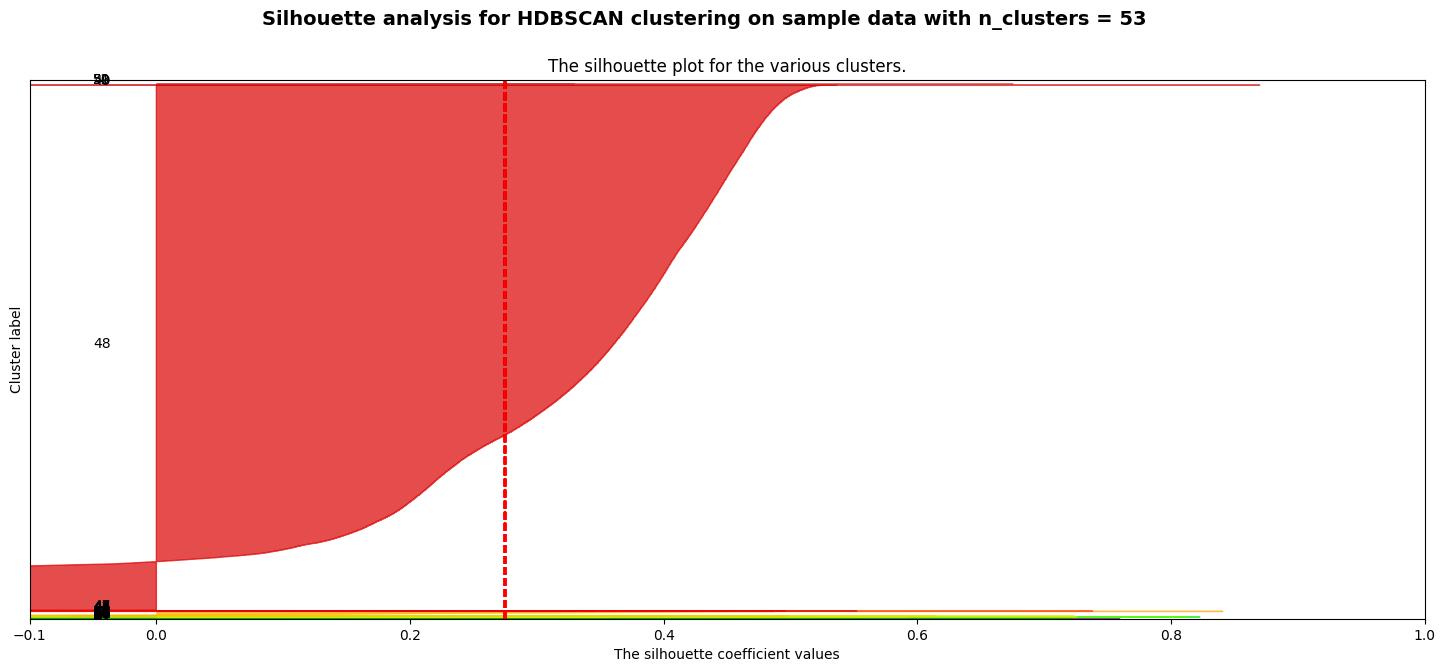

In [9]:
clustered_data = pd.read_csv("clustered_data.csv")
silhouette_df = pd.read_csv("silhouette_df.csv")

sillhouette_avg = silhouette_df.iloc[53].iloc[1]
sillhouette_samples = clustered_data["Silhouette"].to_numpy()
clusters_nr = len(clustered_data["Cluster"].unique())
labels = clustered_data["Cluster"]


sil_Score(n_clusters = clusters_nr, data = clustered_data, labels = labels, sill_avg = sillhouette_avg, sill_sample = sillhouette_samples)

In [10]:
grouped_significant_df = significant_df.groupby("Cluster")
for cluster, data in grouped_significant_df:
    print(f"Cluster {cluster} - Significant Features (p < 0.05):")
    print(data[["Feature", "Statistic", "P-value", "Test type"]])   
    print("\n" + "="*50 + "\n")

Cluster -1 - Significant Features (p < 0.05):
                          Feature    Statistic        P-value      Test type
90                    Height_(cm)    15.142680  8.358357e-132  ANOVA, F-test
91                    Weight_(kg)    56.629510   0.000000e+00  ANOVA, F-test
92                            BMI    72.648836   0.000000e+00  ANOVA, F-test
93            Alcohol_Consumption    24.564470  1.298130e-232  ANOVA, F-test
94              Fruit_Consumption   977.070320   0.000000e+00  ANOVA, F-test
95   Green_Vegetables_Consumption  1714.322836   0.000000e+00  ANOVA, F-test
96        FriedPotato_Consumption  2375.222546   0.000000e+00  ANOVA, F-test
97            General_Health_Fair    58.598155   1.933977e-14    Chi-Squared
98            General_Health_Poor    56.295972   6.234300e-14    Chi-Squared
99       General_Health_Very Good    64.501253   9.647099e-16    Chi-Squared
100   Checkup_5 or more years ago    13.516137   2.365207e-04    Chi-Squared
101  Checkup_Within the past y

In [11]:
print(silhouette_df[["Cluster","Average_Silhouette","Data Points"]].sort_values(by=["Average_Silhouette"],ascending=False).head())

   Cluster  Average_Silhouette  Data Points
50      49            0.825404           14
43      42            0.807259            6
34      33            0.778048            6
31      30            0.758110            6
45      44            0.692212            7


In [12]:
print(silhouette_df[["Cluster","Average_Silhouette","Data Points"]].sort_values(by=["Average_Silhouette"],ascending=False))

    Cluster  Average_Silhouette  Data Points
50       49            0.825404           14
43       42            0.807259            6
34       33            0.778048            6
31       30            0.758110            6
45       44            0.692212            7
3         2            0.679306            5
39       38            0.669570            9
18       17            0.650901            6
14       13            0.645083            5
36       35            0.643940            5
26       25            0.634193            5
7         6            0.618495            5
33       32            0.610039            7
52       51            0.602735           15
9         8            0.558063            5
32       31            0.533196            7
40       39            0.496302           12
23       22            0.471738            5
48       47            0.467087           13
1         0            0.434683            7
12       11            0.432789           18
37       3

In [13]:
#print(silhouette_df[["Cluster","Average_Silhouette","Data Points"]].sort_values(by=["Average_Silhouette"],ascending=False
sil_filter = silhouette_df.loc[silhouette_df["Data Points"] > 20, ["Cluster", "Average_Silhouette", "Data Points"]].sort_values(by="Average_Silhouette", ascending=False)
print(sil_filter)

    Cluster  Average_Silhouette  Data Points
27       26            0.411958           34
46       45            0.337128           30
41       40            0.320342           28
17       16            0.312155           51
49       48            0.282593       301591
53  Overall            0.274894       308854
10        9            0.267339           21
19       18            0.250754           23
21       20            0.248741           51
44       43            0.243773          102
29       28            0.224584          103
13       12            0.210967           30
11       10            0.204461          103
47       46            0.191009          209
22       21            0.185517           39
28       27            0.167879          225
42       41            0.158267         2542
35       34            0.142446          173
51       50            0.097216          650
25       24            0.078206           61
38       37           -0.106651          293
0        -

In [14]:
print(sil_filter.head(5))

   Cluster  Average_Silhouette  Data Points
27      26            0.411958           34
46      45            0.337128           30
41      40            0.320342           28
17      16            0.312155           51
49      48            0.282593       301591


In [15]:
sil_filter = silhouette_df.loc[silhouette_df["Data Points"] > 20, ["Cluster", "Average_Silhouette", "Data Points"]].sort_values(by="Average_Silhouette", ascending=False)
chosen_5 = sil_filter["Cluster"].head(5).astype(int).tolist()


In [16]:
chosen_5

[26, 45, 40, 16, 48]

In [17]:
def signi_feature(cluster_number):
    filtered_significant_df = significant_df[significant_df['Cluster'].isin(cluster_number)]

    grouped_significant_df = filtered_significant_df.groupby("Cluster")
    for cluster, data in grouped_significant_df:
        print(f"Cluster {cluster} - Significant Features (p < 0.05):")
        print(data[["Feature", "Statistic", "P-value", "Test type"]])   
        print("\n" + "="*50 + "\n")

In [18]:
signi_feature([1])

Cluster 1 - Significant Features (p < 0.05):
                          Feature    Statistic        P-value      Test type
307                   Height_(cm)    15.142680  8.358357e-132  ANOVA, F-test
308                   Weight_(kg)    56.629510   0.000000e+00  ANOVA, F-test
309                           BMI    72.648836   0.000000e+00  ANOVA, F-test
310           Alcohol_Consumption    24.564470  1.298130e-232  ANOVA, F-test
311             Fruit_Consumption   977.070320   0.000000e+00  ANOVA, F-test
312  Green_Vegetables_Consumption  1714.322836   0.000000e+00  ANOVA, F-test
313       FriedPotato_Consumption  2375.222546   0.000000e+00  ANOVA, F-test




In [19]:
signi_feature(chosen_5)

Cluster 16 - Significant Features (p < 0.05):
                          Feature    Statistic        P-value      Test type
248                   Height_(cm)    15.142680  8.358357e-132  ANOVA, F-test
249                   Weight_(kg)    56.629510   0.000000e+00  ANOVA, F-test
250                           BMI    72.648836   0.000000e+00  ANOVA, F-test
251           Alcohol_Consumption    24.564470  1.298130e-232  ANOVA, F-test
252             Fruit_Consumption   977.070320   0.000000e+00  ANOVA, F-test
253  Green_Vegetables_Consumption  1714.322836   0.000000e+00  ANOVA, F-test
254       FriedPotato_Consumption  2375.222546   0.000000e+00  ANOVA, F-test
255                      Sex_Male    13.372574   2.553307e-04    Chi-Squared
256            Age_Category_30-34     4.177390   4.096674e-02    Chi-Squared


Cluster 26 - Significant Features (p < 0.05):
                             Feature    Statistic        P-value  \
297                      Height_(cm)    15.142680  8.358357e-132   


In [20]:
def analys_cluster(cluster_nr):
    stat_num, df, stat_cat = [clustered_data[clustered_data["Cluster"] == cluster_nr].describe(),
               clustered_data[clustered_data["Cluster"] == cluster_nr],
               clustered_data[clustered_data["Cluster"] == cluster_nr].describe(include="bool")]
    return df,stat_num,stat_cat

Ex analys av cluster 0

In [21]:
df_0, stat_n_0, stat_cat_0 = analys_cluster(0)

In [22]:
df_0

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes,Cluster,Silhouette
96198,180.0,66.68,20.50,0.0,2.0,120.0,120.0,False,False,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,0,0.342158
158699,173.0,74.84,25.09,24.0,30.0,120.0,120.0,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0.379338
186359,168.0,88.45,31.47,2.0,12.0,120.0,120.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,0,0.514334
209645,175.0,104.33,33.96,2.0,4.0,120.0,120.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,0,0.369522
263151,175.0,81.65,26.58,15.0,12.0,120.0,120.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,0,0.531806
270708,168.0,86.18,30.67,2.0,16.0,120.0,120.0,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,0,0.529099
286101,183.0,72.57,21.70,4.0,30.0,120.0,120.0,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,True,0,0.376524


In [23]:
stat_n_0

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Cluster,Silhouette
count,7.000000,7.000000,7.000000,7.0,7.000000,7.0,7.0,7.0,7.000000
mean,174.571429,82.100000,27.138571,7.0,15.142857,120.0,120.0,0.0,0.434683
std,5.623082,12.467619,5.097736,9.0,11.246163,0.0,0.0,0.0,0.085580
min,168.000000,66.680000,20.500000,0.0,2.000000,120.0,120.0,0.0,0.342158
25%,170.500000,73.705000,23.395000,2.0,8.000000,120.0,120.0,0.0,0.373023
50%,175.000000,81.650000,26.580000,2.0,12.000000,120.0,120.0,0.0,0.379338
75%,177.500000,87.315000,31.070000,9.5,23.000000,120.0,120.0,0.0,0.521717
max,183.000000,104.330000,33.960000,24.0,30.000000,120.0,120.0,0.0,0.531806


In [24]:
stat_cat_0

,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes
count,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
unique,2,1,2,2,1,2,1,2,2,1,1,2,2,2,1,1,2,1,1,2,2,2,1,1,1,1,1,1,1,2,2
top,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
freq,6,7,6,4,7,6,7,6,5,7,7,6,5,6,7,7,6,7,7,6,5,4,7,7,7,7,7,7,7,6,4


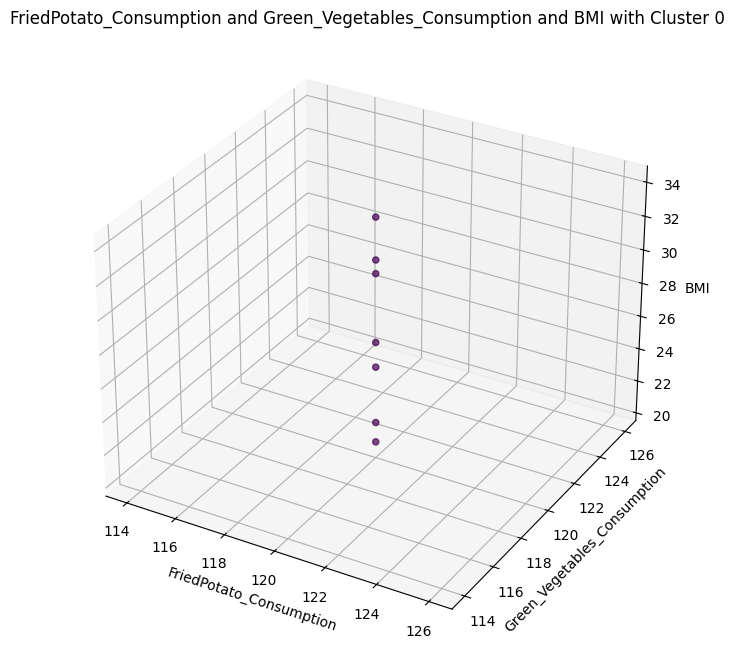

In [25]:
plot_3d("FriedPotato_Consumption","Green_Vegetables_Consumption","BMI",0)

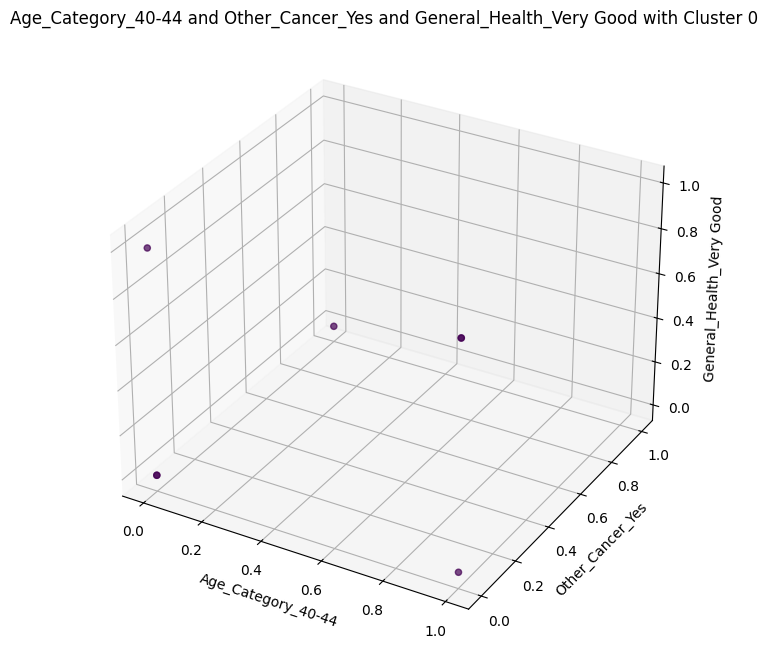

In [26]:
plot_3d("Age_Category_40-44","Other_Cancer_Yes","General_Health_Very Good",0)

Om vi kollar igenom datapunkterna för cluster 0 kan vi se att dem signifikanta pberoende variablerna framstår, 
- vi kan se att alla patienter har en speciell diet.
- dem äter väldigt mycket och majoriteten tränar.
- samt att deras hälsa är very good eller excellent.
- detta klustret innehåller oxå bara män
- en motgående faktor är att det finns en patient som är sjuk (cancer och Arthritis) 

In [27]:
def health_heatmap(df, columns):
    health_proportion = df[columns].apply(lambda x: x.value_counts(normalize=True).get(True, 0))

    # Plot the heatmap
    plt.figure(figsize=(10, 5))
    sns.heatmap(health_proportion.to_frame().T, annot=True, cmap="coolwarm", cbar_kws={"label": "Proportion of True"})
    plt.title("Proportion of 'True'")
    plt.show()
    
def plot_dist(df,feature):
    health_distribution = df[feature].value_counts()

    # Plotting the distribution as a bar plot
    plt.figure(figsize=(8, 5))
    health_distribution.plot(kind="bar", color=["skyblue"])
    plt.title("Distribution in cluster")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.show()

In [83]:
categorical_features = clustered_data.select_dtypes(include=['bool']).columns.tolist()
numerical_features = clustered_data.drop(categorical_features, axis=1).columns.tolist()

In [84]:
print(categorical_features)
print(numerical_features)
health_columns = categorical_features[:4]
print(health_columns)
checkup_column = categorical_features[4:8]
print(checkup_column)
conditions_columns = categorical_features[9:17]
print(conditions_columns)
profile_columns = [categorical_features[8], categorical_features[17], categorical_features[-1]]
print(profile_columns)
age_column = categorical_features[18:-1]
print(age_column)
food_column = numerical_features[3:-2]
print(food_column)
num_profile_column = numerical_features[:3]
print(num_profile_column)



['General_Health_Fair', 'General_Health_Good', 'General_Health_Poor', 'General_Health_Very Good', 'Checkup_5 or more years ago', 'Checkup_Within the past 2 years', 'Checkup_Within the past 5 years', 'Checkup_Within the past year', 'Exercise_Yes', 'Heart_Disease_Yes', 'Skin_Cancer_Yes', 'Other_Cancer_Yes', 'Depression_Yes', 'Diabetes_No, pre-diabetes or borderline diabetes', 'Diabetes_Yes', 'Diabetes_Yes, but female told only during pregnancy', 'Arthritis_Yes', 'Sex_Male', 'Age_Category_25-29', 'Age_Category_30-34', 'Age_Category_35-39', 'Age_Category_40-44', 'Age_Category_45-49', 'Age_Category_50-54', 'Age_Category_55-59', 'Age_Category_60-64', 'Age_Category_65-69', 'Age_Category_70-74', 'Age_Category_75-79', 'Age_Category_80+', 'Smoking_History_Yes']
['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption', 'Cluster', 'Silhouette']
['General_Health_Fair', 'General_Health_Good', 'General_Health_Poor', 'G

In [30]:
print(len(age_column))

12


In [31]:
chosen_5

[26, 45, 40, 16, 48]

In [32]:
def get_excellent_health(df):
    temp = df
    count_false_health = temp[(temp['General_Health_Fair'] == False) & 
                              (temp['General_Health_Good'] == False) & 
                              (temp['General_Health_Very Good'] == False) & 
                              (temp['General_Health_Poor'] == False)].shape[0]
    print(f"General_Health_Excellent: {count_false_health}")
    
def get_18_24_age(df):
    temp = df
    count_false = temp[(temp[age_column[0]] == False) & 
                        (temp[age_column[1]] == False) & 
                        (temp[age_column[2]] == False) & 
                        (temp[age_column[3]] == False) & 
                        (temp[age_column[4]] == False) & 
                        (temp[age_column[5]] == False) & 
                        (temp[age_column[6]] == False) & 
                        (temp[age_column[7]] == False) & 
                        (temp[age_column[8]] == False) &
                        (temp[age_column[9]] == False) &
                        (temp[age_column[10]] == False) &
                        (temp[age_column[11]] == False)].shape[0]
    print(f"Age_Category_18_24: {count_false}")
    

def get_Checkup_never(df):
    temp = df
    count_false = temp[(temp["Checkup_Within the past year"] == False) & 
                        (temp["Checkup_Within the past year"] == False) & 
                        (temp["Checkup_Within the past 5 years"] == False) & 
                        (temp["Checkup_5 or more years ago"] == False)].shape[0]
    print(f"Checkup_never: {count_false}")

In [33]:
def plot_bmi_cate(df):
    """plot bmi categorized
    bmi < 18.5:         Underweight
    18.5 <= bmi < 24.9: Normal weight
    25.0 <= bmi < 29.9: Overweight
    29.9 <  bmi:        Obesity
    Args:
        df (pd.Dataframe): with BMi
    """
    
    def categorize_bmi(bmi):
        if bmi < 18.5:
            return 'Underweight'
        elif 18.5 <= bmi < 24.9:
            return 'Normal weight'
        elif 25.0 <= bmi < 29.9:
            return 'Overweight'
        else:
            return 'Obesity'

    x = df
    
    # Apply categorization to the DataFrame
    x.loc[:, "BMI_Category"] = x["BMI"].apply(categorize_bmi)

    # Plot the distribution of BMI categories
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='BMI_Category', hue='BMI_Category', palette="viridis", order=['Underweight', 'Normal weight', 'Overweight', 'Obesity'], legend=False)
    plt.xlabel('BMI Category')
    plt.ylabel('Count')
    plt.title('Distribution of BMI Categories')
    plt.show()

In [34]:
top_5_cluster_info = []

for cluster in chosen_5:
    top_5_cluster_info.append(analys_cluster(cluster))

In [35]:
print(len(top_5_cluster_info),len(top_5_cluster_info[0]))

5 3


In [36]:
signi_feature([chosen_5[0]])

Cluster 26 - Significant Features (p < 0.05):
                             Feature    Statistic        P-value  \
297                      Height_(cm)    15.142680  8.358357e-132   
298                      Weight_(kg)    56.629510   0.000000e+00   
299                              BMI    72.648836   0.000000e+00   
300              Alcohol_Consumption    24.564470  1.298130e-232   
301                Fruit_Consumption   977.070320   0.000000e+00   
302     Green_Vegetables_Consumption  1714.322836   0.000000e+00   
303          FriedPotato_Consumption  2375.222546   0.000000e+00   
304  Checkup_Within the past 2 years     5.382296   2.034209e-02   
305                    Arthritis_Yes     9.942411   1.615138e-03   
306              Smoking_History_Yes     4.826668   2.802274e-02   

         Test type  
297  ANOVA, F-test  
298  ANOVA, F-test  
299  ANOVA, F-test  
300  ANOVA, F-test  
301  ANOVA, F-test  
302  ANOVA, F-test  
303  ANOVA, F-test  
304    Chi-Squared  
305    Chi-Squar

ANOVA, F-test Results:

- The continuous features like Height_(cm), Weight_(kg), BMI, Alcohol Consumption, Fruit Consumption, Green Vegetables Consumption, and Fried Potato Consumption all show highly significant F-statistics and extremely low p-values.
- These large F-statistics indicate that these individuals in Cluster 26 have distinct patterns in physical characteristics and dietary habits compared to other clusters, possibly pointing to notable lifestyle or nutritional trends within this group.


Chi-Squared Test Results:

- Checkup Within the Past 2 Years: This has a p-value of 0.0203, suggesting a statistically significant association between the frequency of checkups and this cluster, possibly indicating that individuals in Cluster 26 may prioritize regular health checkups.
- Arthritis_Yes: With a p-value of 0.0016, arthritis status is significantly associated with Cluster 26, which might suggest a higher prevalence of arthritis within this group.
- Smoking History_Yes: The p-value of 0.028 suggests a significant relationship between smoking history and Cluster 26. This implies that smoking may be more common in this cluster or have a unique association within it.

Summary: 
- Cluster 26 appears to have unique characteristics that distinguish it from other clusters, particularly regarding physical attributes, dietary habits, and certain health conditions or behaviors like regular checkups, arthritis, and smoking history.

In [37]:
top_5_cluster_info[0][0]

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes,Cluster,Silhouette
12022,168.0,68.04,24.21,0.0,60.0,60.0,60.0,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,26,0.543088
19133,157.0,65.77,26.52,8.0,60.0,60.0,60.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,26,0.427376
22605,157.0,72.57,29.26,0.0,50.0,50.0,50.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,26,0.265166
24306,157.0,95.25,38.41,0.0,60.0,60.0,60.0,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,26,0.235539
25184,155.0,49.90,20.77,0.0,60.0,60.0,60.0,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,26,0.316943
38427,168.0,86.18,30.67,2.0,60.0,60.0,60.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,26,0.417300
41753,180.0,74.84,23.01,0.0,60.0,60.0,60.0,False,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,26,0.429955
73240,160.0,77.11,30.11,0.0,60.0,60.0,60.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,26,0.483380
74972,157.0,58.97,23.78,1.0,60.0,60.0,60.0,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,26,0.418864
103421,168.0,58.97,20.98,4.0,60.0,60.0,60.0,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,26,0.475140


In [38]:
top_5_cluster_info[0][1]
#låg friedpotato consumption, 

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Cluster,Silhouette
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.0,34.000000
mean,166.794118,73.015294,26.338529,2.029412,59.705882,59.705882,59.705882,26.0,0.411958
std,7.846170,13.910438,5.142117,3.613823,1.714986,1.714986,1.714986,0.0,0.104831
min,155.000000,49.900000,15.780000,0.000000,50.000000,50.000000,50.000000,26.0,0.105913
25%,160.000000,63.615000,23.017500,0.000000,60.000000,60.000000,60.000000,26.0,0.337196
50%,168.000000,73.705000,25.350000,0.000000,60.000000,60.000000,60.000000,26.0,0.436983
75%,173.000000,81.082500,30.162500,2.000000,60.000000,60.000000,60.000000,26.0,0.482323
max,183.000000,104.330000,38.410000,12.000000,60.000000,60.000000,60.000000,26.0,0.545864


In [39]:
top_5_cluster_info[0][0]["Green_Vegetables_Consumption"].value_counts()

Green_Vegetables_Consumption
60.0    33
50.0     1
Name: count, dtype: int64

In [40]:
chosen_5

[26, 45, 40, 16, 48]

In [71]:
def histplot(column,df):
    plt.figure(figsize=(12, 8))
    for col in column:
        sns.histplot(df[col], kde=True, label=col, bins=15, alpha=0.80)

    plt.title("Distribution of Features (Histogram)")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(title="Feature")
    plt.show()

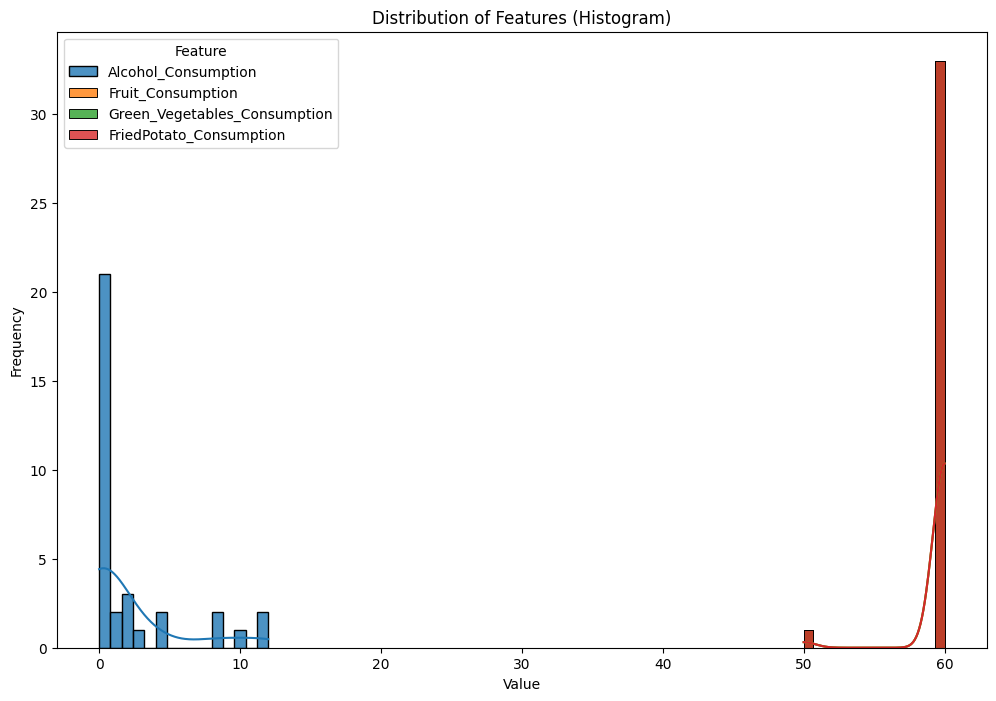

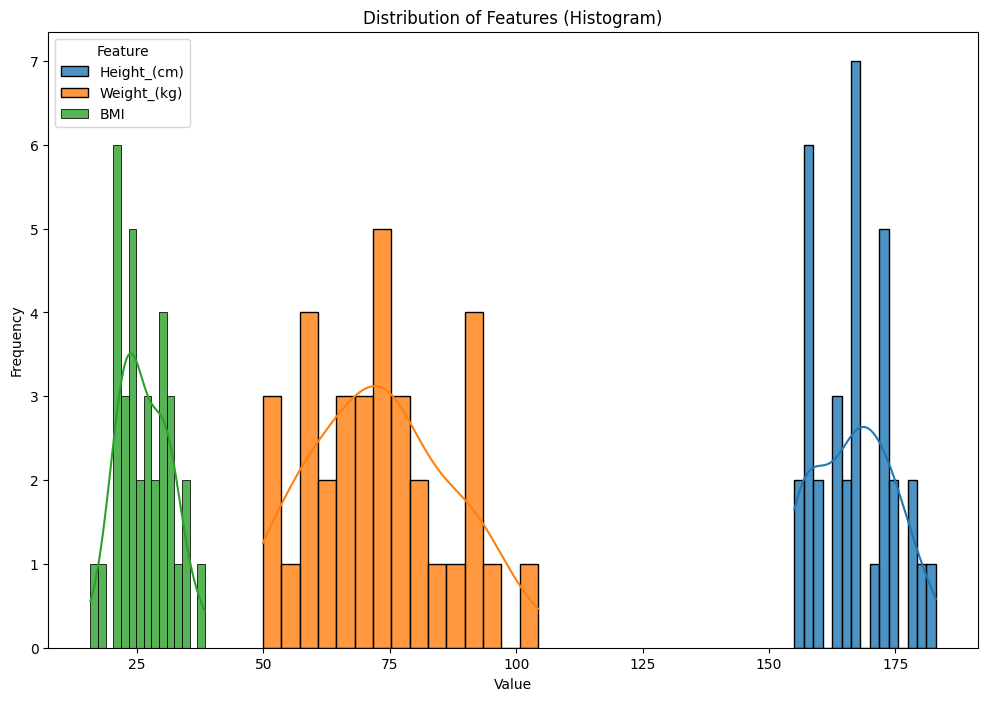

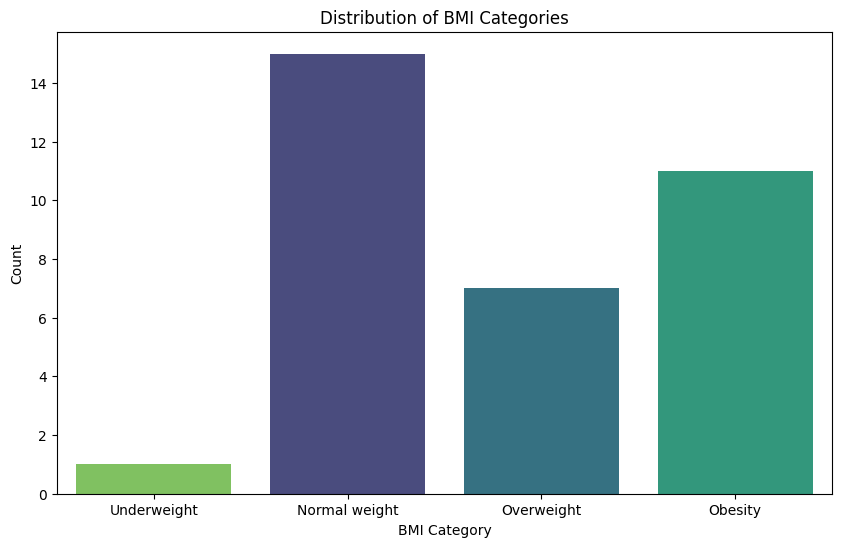

In [72]:
histplot(food_column,top_5_cluster_info[0][0])
histplot(num_profile_column,top_5_cluster_info[0][0])
plot_bmi_cate(top_5_cluster_info[0][0])

In [73]:
top_5_cluster_info[0][2]

,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes
count,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
unique,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2
top,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,31,29,33,27,34,25,33,24,25,32,31,33,32,32,31,34,32,19,30,30,31,30,29,32,31,28,33,33,34,34,27


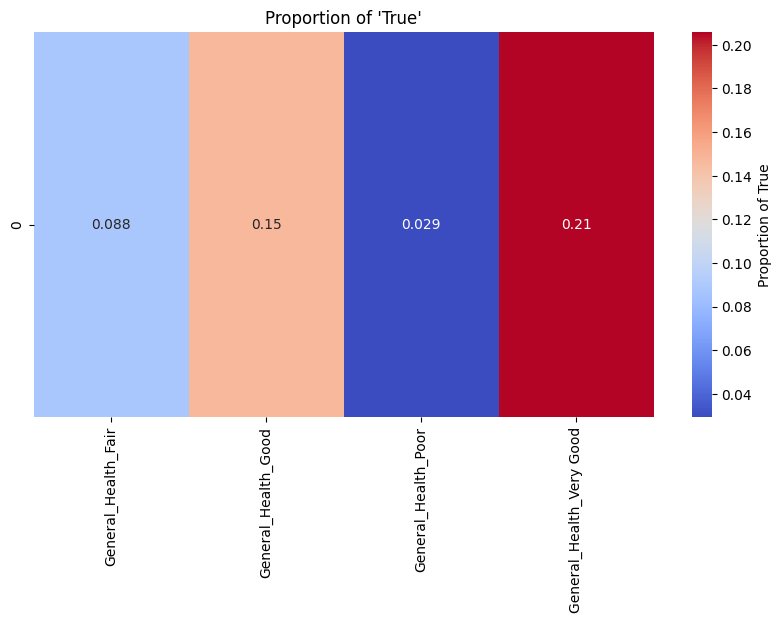

General_Health_Excellent: 18
General_Health_Fair         3
General_Health_Good         5
General_Health_Poor         1
General_Health_Very Good    7
dtype: int64


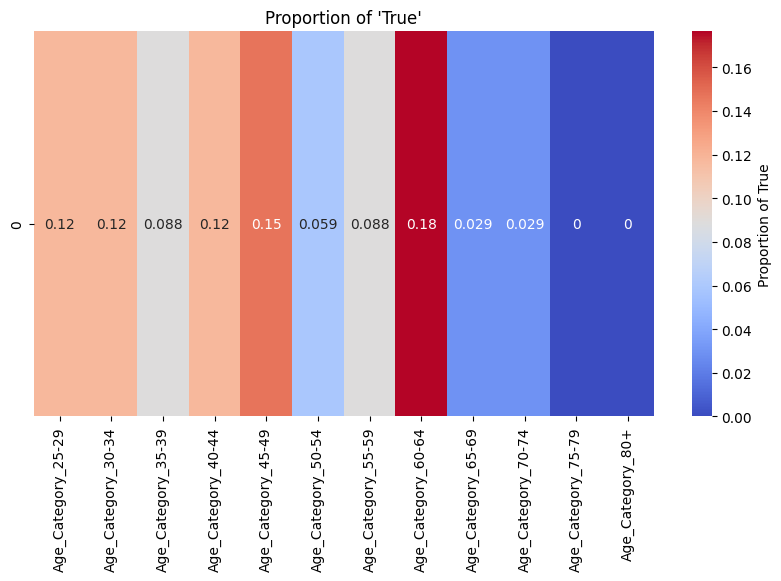

Age_Category_18_24: 1
Age_Category_25-29    4
Age_Category_30-34    4
Age_Category_35-39    3
Age_Category_40-44    4
Age_Category_45-49    5
Age_Category_50-54    2
Age_Category_55-59    3
Age_Category_60-64    6
Age_Category_65-69    1
Age_Category_70-74    1
Age_Category_75-79    0
Age_Category_80+      0
dtype: int64


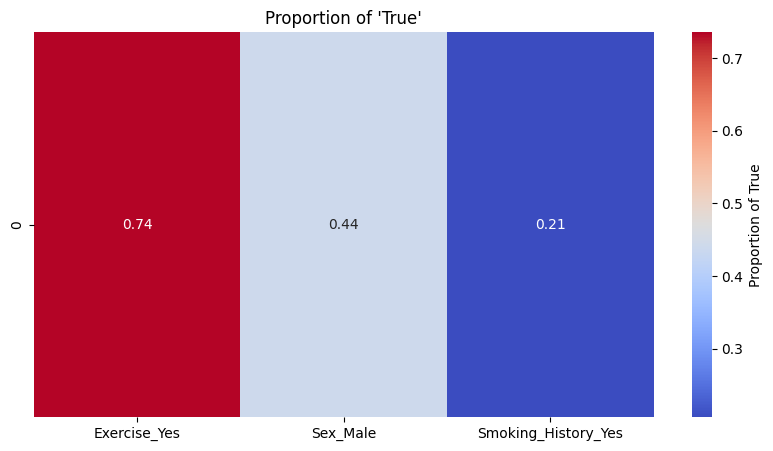

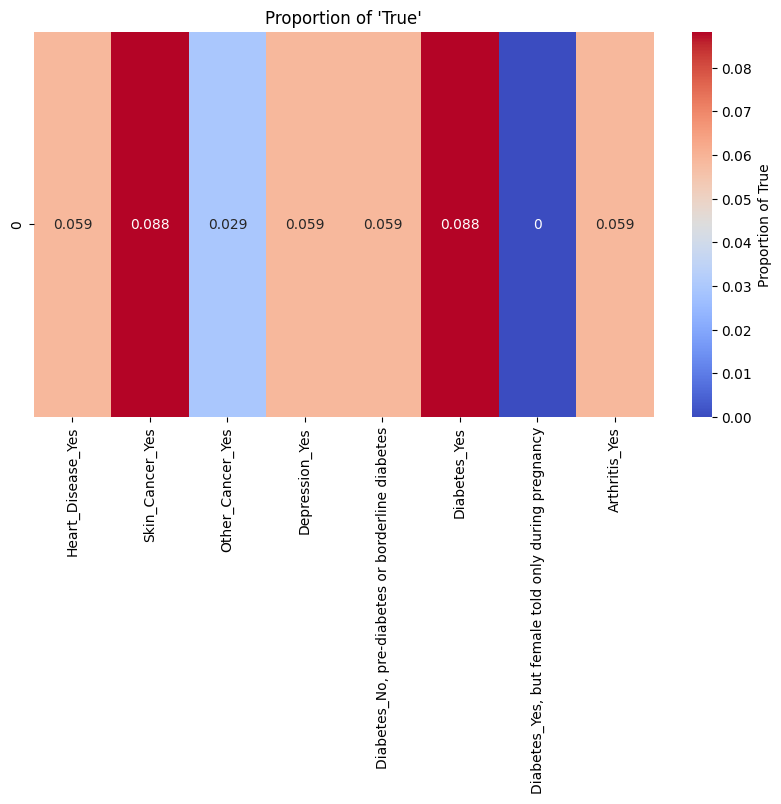

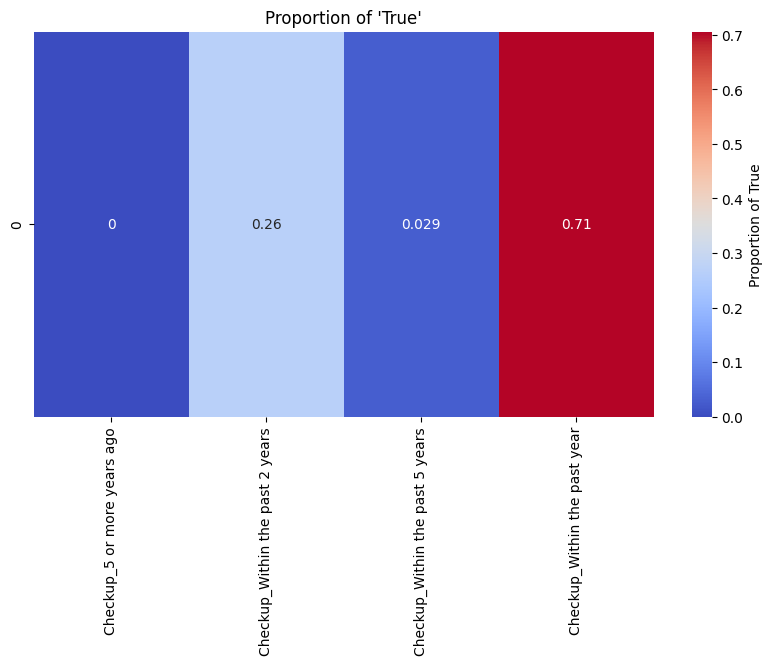

Checkup_never: 9
Checkup_5 or more years ago         0
Checkup_Within the past 2 years     9
Checkup_Within the past 5 years     1
Checkup_Within the past year       24
dtype: int64


In [74]:
health_heatmap(top_5_cluster_info[0][0],health_columns)
get_excellent_health(top_5_cluster_info[0][0])
print(top_5_cluster_info[0][0][health_columns].sum())
health_heatmap(top_5_cluster_info[0][0],age_column)
get_18_24_age(top_5_cluster_info[0][0])
print(top_5_cluster_info[0][0][age_column].sum())
health_heatmap(top_5_cluster_info[0][0],profile_columns)
health_heatmap(top_5_cluster_info[0][0],conditions_columns)
health_heatmap(top_5_cluster_info[0][0],checkup_column)
get_Checkup_never(top_5_cluster_info[0][0])
print(top_5_cluster_info[0][0][checkup_column].sum())
#quite evenly distrubuted

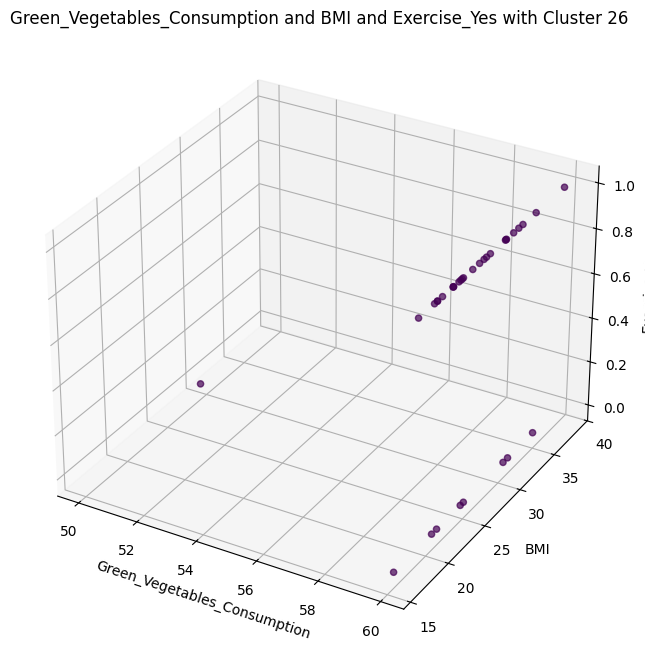

In [75]:
plot_3d("Green_Vegetables_Consumption","BMI","Exercise_Yes",chosen_5[0])

Combined Numerical and catagorical summery: 
This descriptive summary for Cluster 26 reveals several key insights about the physical characteristics, dietary habits:

Physical Characteristics:

- Height: The average height is 166.8 cm, with a standard deviation of 7.8 cm, indicating moderate variability. Heights range from 155 cm to 183 cm.
- Weight: The mean weight is 73 kg, with a relatively high standard deviation of 13.9 kg, suggesting a broader range of weights (49.9 kg to 104.3 kg). This could reflect a mix of body compositions.
- BMI: The average BMI is 26.3, slightly above the general healthy range, indicating a tendency toward overweight within this cluster. The BMI values range from 15.78 (underweight) to 38.41 (obese), highlighting diversity in body composition.

Dietary Habits:

- Alcohol Consumption: The mean is 2.03, but with a high standard deviation of 3.61 and a maximum of 12. This wide range suggests variability, with many individuals likely consuming no alcohol (median of 0).
- Fruit, Green Vegetable, and Fried Potato Consumption: The averages for these are all around 59.7, with a very low standard deviation (1.7). Given the range is between 50 and 60, this points to a consistent pattern of high consumption in these categories across most 
- individuals in the cluster. This consistency may reflect unique dietary habits within Cluster 26, where high consumption of these foods is common.

Summary:
- Cluster 26 represents individuals who have relatively diverse body characteristics (especially in BMI and weight) and consistent dietary patterns with high intake of fruits, green vegetables, and fried potatoes. The moderate silhouette score supports a distinct but not
- highly compact grouping, meaning individuals are relatively close to their cluster center but with some variability. This mix of dietary consistency and body composition variability could reflect a group with similar nutritional habits but diverse physical outcomes.

In Cluster 26, this data provides insight into the general health, checkup frequency, lifestyle habits, and demographic features

General Health:

- The majority of individuals report "Fair" (3), "Good" (5), "Poor" (1) "Very Good" (7) and Excellent (18). This suggests that most individuals in this cluster lean toward above-average to excellent health.
Health Checkups:

- individuals reported that majority of their last checkup was "Checkup the past year or past 2 years"recent checkups, with a few individuals never having a checkup
Lifestyle:

- Exercise: A slight majority reported "Exercise_Yes" (25 out of 34), meaning a fair number of people engage in physical activity.
Smoking History: 27 of the individuals report a "False" for smoking history, showing a relatively low prevalence of smoking in this group.

Chronic Conditions:
- Heart Disease, Skin Cancer, Other Cancer, Depression, Arthritis, Diabetes: High counts for "No" responses across these conditions suggest that most individuals in Cluster 26 are not diagnosed with these issues. However, a small portion may be affected.

Demographics:

- The age groups are well-represented across various categories from "25-29" to "74," suggesting a broad age distribution.
- Gender is somewhat balanced 56/44

Take aways:

- Induviduals seem to be quite short with average to high weight. Looking at BMI we see that most induviduals are normals to overweight or even obese
- These Characteristics combined with high food consumption and low alcohol consumption and high freq of excersizes might consider these induviduals to be athletes or bodybuilders
- high weight and high BMI doesn't need to point to obeseity as we do not have a metric for % bodyfat. Intensive elite training such as in sports or bodybuilding tend to have high BMI as bmi is calculated by high, weight and age

- this fact is also supported by the fact that majority of induviduals here have recent checkups

In [76]:
signi_feature([chosen_5[1]])

Cluster 45 - Significant Features (p < 0.05):
                                               Feature    Statistic  \
337                                        Height_(cm)    15.142680   
338                                        Weight_(kg)    56.629510   
339                                                BMI    72.648836   
340                                Alcohol_Consumption    24.564470   
341                                  Fruit_Consumption   977.070320   
342                       Green_Vegetables_Consumption  1714.322836   
343                            FriedPotato_Consumption  2375.222546   
344  Diabetes_Yes, but female told only during preg...     6.063914   

           P-value      Test type  
337  8.358357e-132  ANOVA, F-test  
338   0.000000e+00  ANOVA, F-test  
339   0.000000e+00  ANOVA, F-test  
340  1.298130e-232  ANOVA, F-test  
341   0.000000e+00  ANOVA, F-test  
342   0.000000e+00  ANOVA, F-test  
343   0.000000e+00  ANOVA, F-test  
344   1.379716e-02    Chi-

In [77]:
top_5_cluster_info[1][0]

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes,Cluster,Silhouette,BMI_Category
15526,165.0,62.60,22.96,0.0,40.0,90.0,30.0,False,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,45,0.414451,Normal weight
15786,168.0,104.33,37.12,1.0,30.0,90.0,30.0,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,45,0.216737,Obesity
21513,175.0,92.99,30.27,4.0,30.0,90.0,30.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,45,0.375111,Obesity
23246,163.0,62.14,23.52,0.0,30.0,90.0,30.0,False,False,False,False,False,True,False,False,True,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,45,0.316271,Normal weight
27176,178.0,65.77,20.81,0.0,30.0,90.0,30.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,45,0.390094,Normal weight
27854,180.0,77.11,23.71,2.0,20.0,90.0,30.0,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,45,0.213204,Normal weight
48942,168.0,61.23,21.79,2.0,30.0,80.0,32.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,45,0.289078,Normal weight
57202,168.0,58.97,20.98,0.0,30.0,90.0,30.0,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,45,0.309559,Normal weight
62117,175.0,74.84,24.37,0.0,30.0,90.0,30.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,45,0.487358,Normal weight
66790,168.0,70.31,25.02,2.0,30.0,90.0,30.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,45,0.456581,Overweight


In [78]:
top_5_cluster_info[1][1]

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Cluster,Silhouette
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.000000
mean,169.466667,76.097333,26.507000,2.000000,29.733333,89.966667,30.066667,45.0,0.337128
std,5.757953,13.686103,4.526883,3.311422,4.160018,2.498045,0.365148,0.0,0.158392
min,160.000000,52.620000,20.550000,0.000000,16.000000,80.000000,30.000000,45.0,-0.335265
25%,165.000000,64.412500,23.377500,0.000000,30.000000,90.000000,30.000000,45.0,0.302071
50%,169.000000,72.570000,25.300000,0.000000,30.000000,90.000000,30.000000,45.0,0.360627
75%,174.500000,86.180000,29.587500,2.000000,30.000000,90.000000,30.000000,45.0,0.447625
max,180.000000,104.330000,37.280000,12.000000,40.000000,99.000000,32.000000,45.0,0.495647


In [79]:
top_5_cluster_info[1][2]

,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes
count,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
unique,2,2,1,2,1,2,2,2,2,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,28,20,30,23,30,25,29,24,22,27,26,30,28,30,26,28,23,16,29,27,26,29,29,27,28,27,28,27,27,29,18


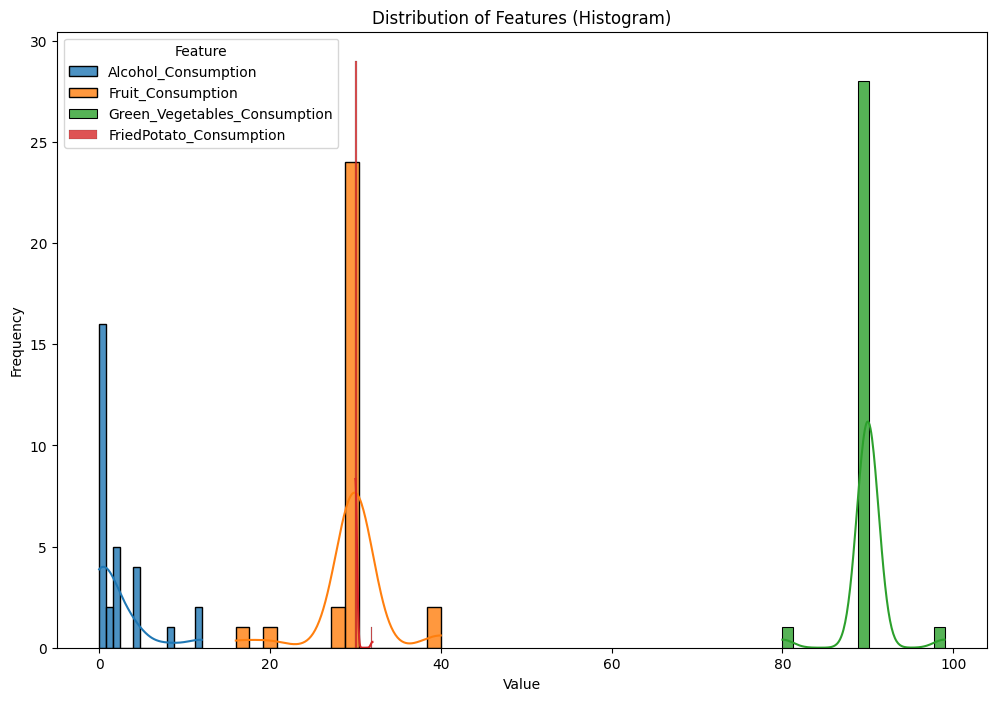

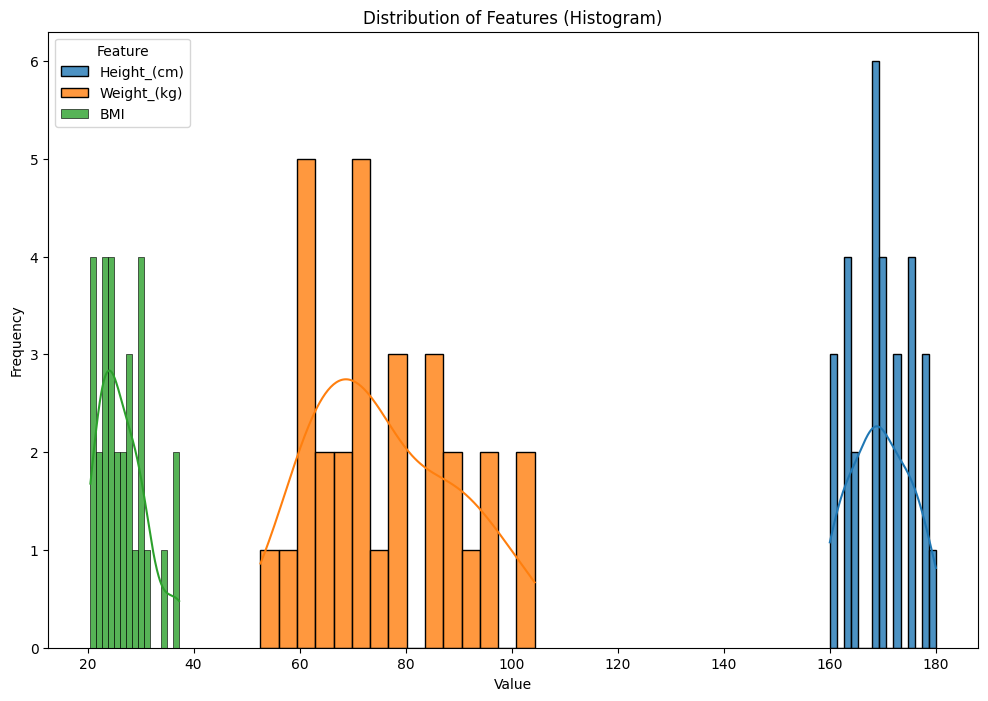

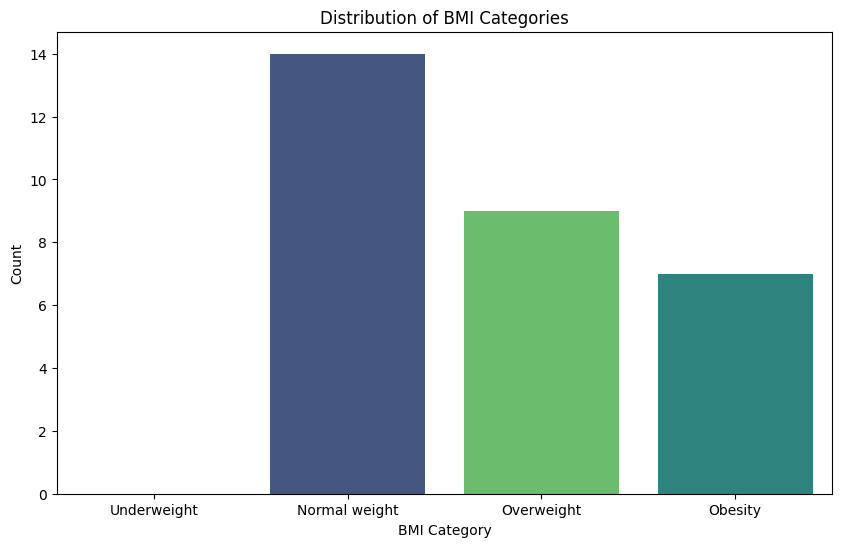

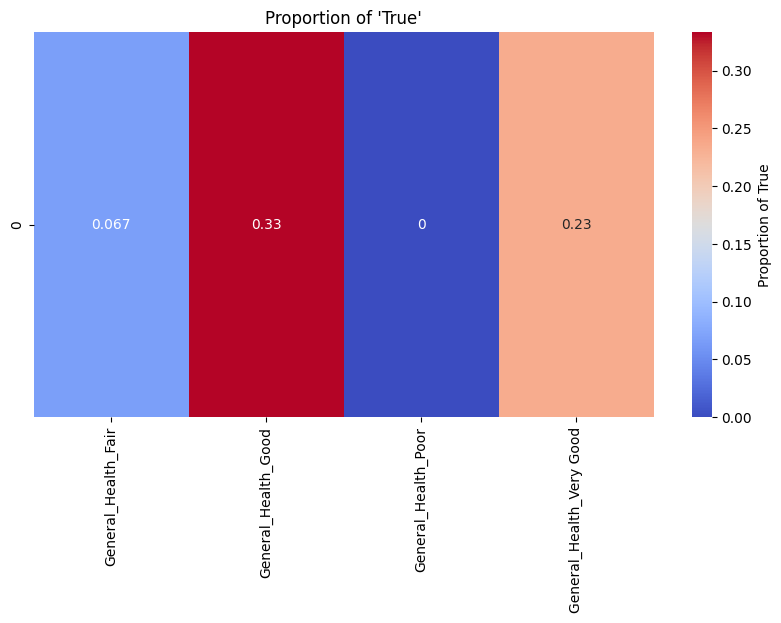

General_Health_Excellent: 11
General_Health_Fair          2
General_Health_Good         10
General_Health_Poor          0
General_Health_Very Good     7
dtype: int64


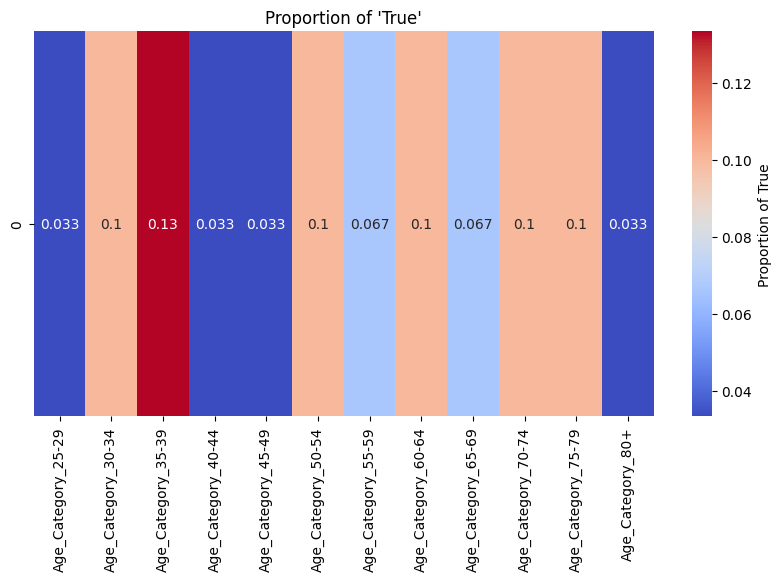

Age_Category_18_24: 3
Age_Category_25-29    1
Age_Category_30-34    3
Age_Category_35-39    4
Age_Category_40-44    1
Age_Category_45-49    1
Age_Category_50-54    3
Age_Category_55-59    2
Age_Category_60-64    3
Age_Category_65-69    2
Age_Category_70-74    3
Age_Category_75-79    3
Age_Category_80+      1
dtype: int64


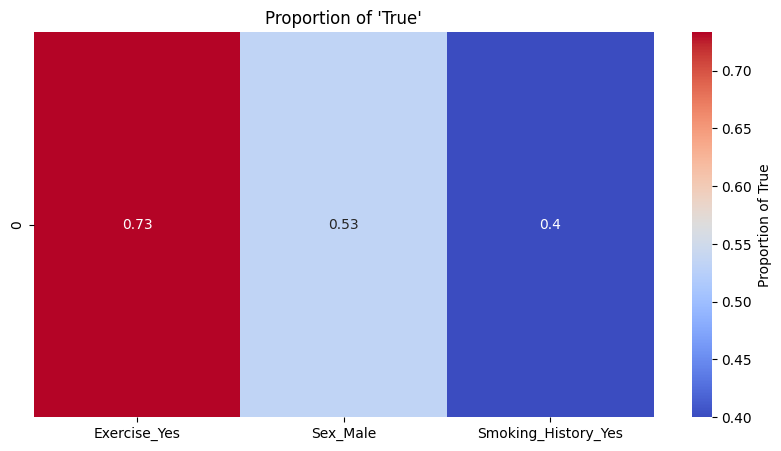

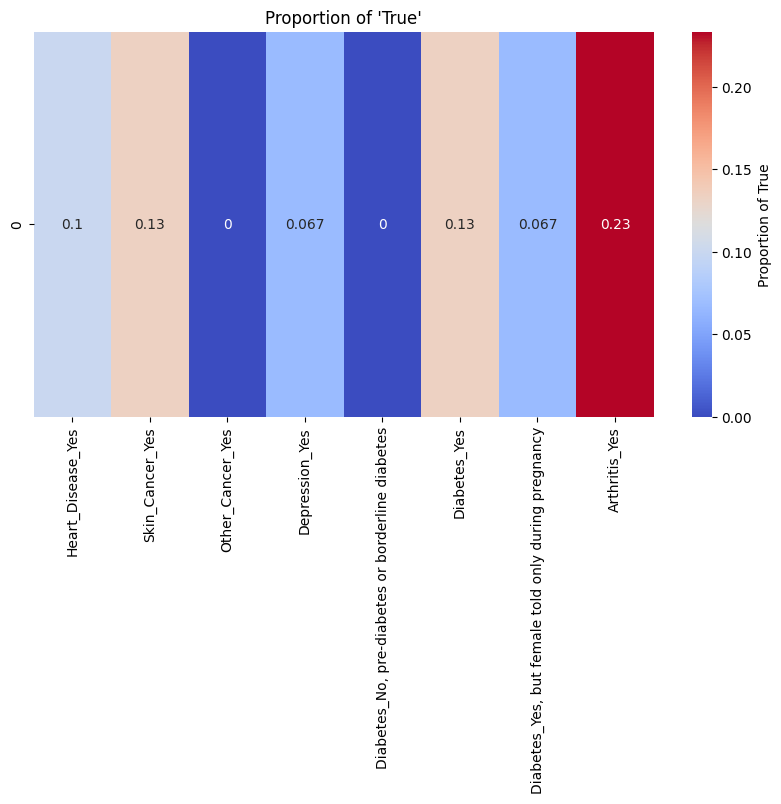

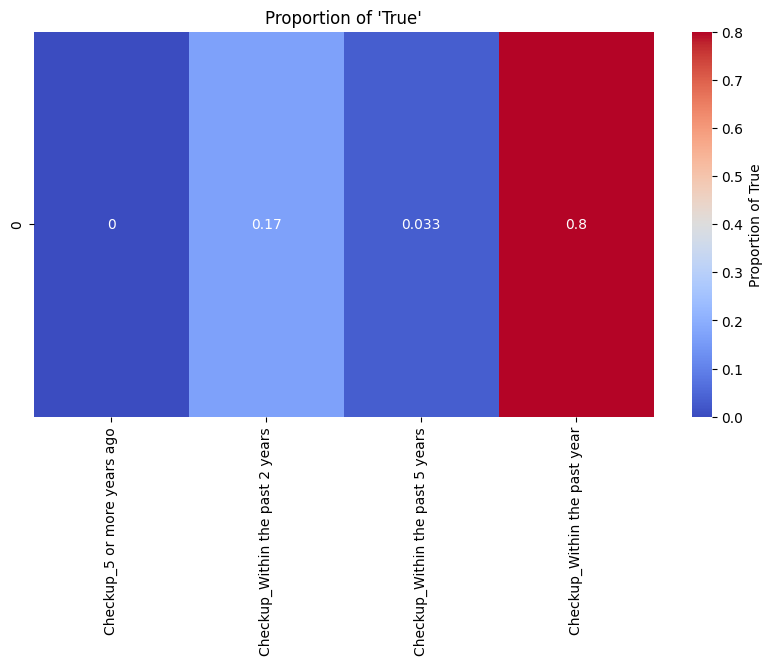

Checkup_never: 5
Checkup_5 or more years ago         0
Checkup_Within the past 2 years     5
Checkup_Within the past 5 years     1
Checkup_Within the past year       24
dtype: int64


In [80]:
x = 1
histplot(food_column,top_5_cluster_info[x][0])
histplot(num_profile_column,top_5_cluster_info[x][0])
plot_bmi_cate(top_5_cluster_info[x][0])
health_heatmap(top_5_cluster_info[x][0],health_columns)
get_excellent_health(top_5_cluster_info[x][0])
print(top_5_cluster_info[x][0][health_columns].sum())
health_heatmap(top_5_cluster_info[x][0],age_column)
get_18_24_age(top_5_cluster_info[x][0])
print(top_5_cluster_info[x][0][age_column].sum())
health_heatmap(top_5_cluster_info[x][0],profile_columns)
health_heatmap(top_5_cluster_info[x][0],conditions_columns)
health_heatmap(top_5_cluster_info[x][0],checkup_column)
get_Checkup_never(top_5_cluster_info[x][0])
print(top_5_cluster_info[x][0][checkup_column].sum())






This descriptive summary of Cluster 45 provides insight into the group's physical attributes, lifestyle habits, and clustering characteristics. Here are the key points:

In Cluster 45, the hypothesis test results highlight several significant health and lifestyle features. Here’s an interpretation of the key findings:

Anthropometric Measures:

- Height, Weight, and BMI all have highly significant p-values close to zero with large F-test statistics, indicating that these measurements vary significantly within this cluster compared to others. The significance suggests that Cluster 45 might have distinct physical characteristics or a unique profile in terms of body composition.
- Height averages around 169.47 cm, with a range from 160 cm to 180 cm, suggesting members are slightly below average in height with moderate variability.
- BMI averages at 26.51, which is on the borderline of overweight, with values ranging from 20.55 to 37.28. This cluster likely includes individuals across normal weight, overweight, and some who may be classified as obese.

Lifestyle and Dietary Habits:

- Alcohol Consumption has a mean of 2.0, with values ranging from 0 to 12. This wide spread indicates varying levels of alcohol use, although most consume low amounts, as indicated by the median and 25th percentile both being 0.
- Alcohol Consumption has a high F-test statistic (24.56) and a near-zero p-value, indicating that alcohol intake in this cluster differs significantly from others. This could be linked to distinct lifestyle patterns within the group.
- Fruit Consumption averages at 29.73 with a relatively low variability, but the range (16 to 40) suggests differences in fruit intake within the cluster, perhaps due to dietary preferences.
- Green Vegetables Consumption shows a high mean of 89.97, and most values are around this number (median and 25th-75th percentiles), indicating consistently high vegetable intake.
- Fried Potato Consumption is consistent, with a mean close to 30 and low standard deviation, suggesting that fried potatoes are part of the diet but at a low and steady level for most.
- Fruit Consumption, Green Vegetables Consumption, and Fried Potato Consumption all have exceptionally high F-test statistics (977.07, 1714.32, and 2375.22, respectively), showing very distinct dietary behaviors compared to other clusters.
- This likely highlights unique dietary trends in Cluster 45, where these food items are either highly consumed or avoided.
- Exercise: A slight majority (22) report "True" for "Exercise_Yes," showing that this cluster generally engages in exercise.


Health Conditions:

General_Health_Fair, Good, Poor, Very Good:
- Fair: (2) indicating that most members do not self-rate their health as "Fair."
- Good: (10) suggesting that most people consider their health good.
- Poor: (0) all reported "False" for "Poor," indicating no individuals consider their health poor.
- Very Good: (7) though this could mean that some do indeed rate their health positively.
- Excellent: (11) combining rest of "False" reports we get induviduals that consider their health Excellent which seems to be the majority 
- This pattern suggests that health perceptions in this cluster are moderately favorable, with a preference toward above-average health to excellent


Healthcare Checkups

- Majority of induviduals have had recent checkup within the past year with a few 2 years ago and few checkup_never
- checkup within the past year are most freq showing high healthcare engagement within the last year.
- most induviduals in this cluster also seem to do frequent checkups

Lifestyle and Health Conditions

- Heart Disease: Only 3 report "True," meaning heart disease is uncommon in this group.
- Skin Cancer: 26 report "False," so skin cancer is also rare.
- Other Cancer: All (30) report "False," indicating no occurrences of cancers besides skin cancer.
- Depression: Depression appears minimal, with 28 indicating "False" for "Depression_Yes."
- Diabetes Yes or Pregnancy-Related Diabetes: There is some occurrence (26 reporting "False" for general diabetes but showing some variation in responses).
- Arthritis: A majority (23 "False") reported they don’t have arthritis, indicating a generally healthy aging profile, though a minority does experience it.

Demographics
- Sex: Almost 50/50
- Age Categories: There is a wide spread across age categories, This cluster may likely includes individuals who are active but managing early age-related health conditions.

- Silhouette Score averages at 0.34, suggesting a moderate level of cluster cohesion. Scores range from -0.34 to 0.50, indicating some members may not fit the cluster's profile as well as others, though most have positive silhouette values.

Summary
- Cluster 45 has distinctive physical characteristics, unique dietary habits, and lifestyle trends that stand out significantly compared to other clusters.
- The marked differences in fruit, vegetable, and fried potato consumption may reflect specific dietary preferences or health considerations within the group. Additionally, the significant diabetes result highlights a noteworthy health feature related to pregnancy.
- Cluster 45 has moderate variability in body measurements and includes individuals with a generally high vegetable intake, moderate fruit consumption, and low but steady fried potato consumption. 
- Cluster 45 includes adults who maintain regular health checkups and generally perceive their health as either "Good", "Very Good." or excellent.
- The cluster shows a relatively high engagement in exercise, minimal presence of heart disease, diabetes, or cancer, and a moderate history of smoking. 



In [81]:
chosen_5[1]

45

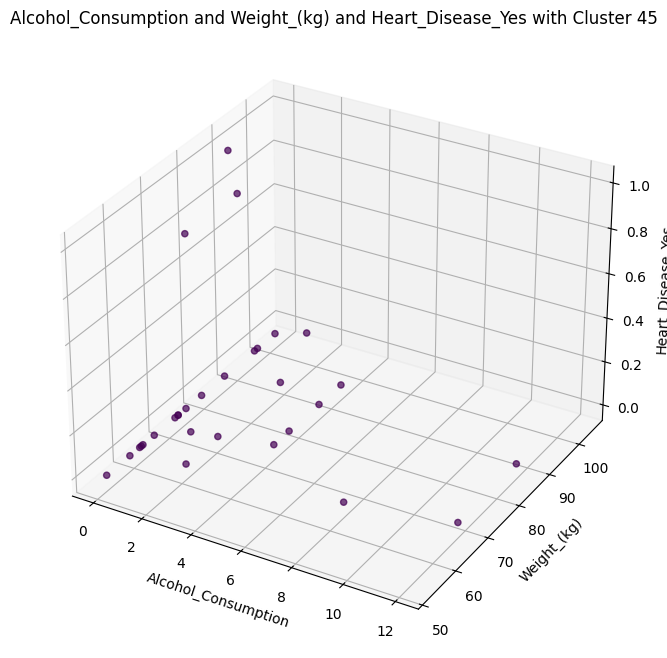

In [82]:
plot_3d("Alcohol_Consumption","Weight_(kg)","Heart_Disease_Yes",45)

In [83]:
signi_feature([chosen_5[2]])

Cluster 40 - Significant Features (p < 0.05):
                          Feature    Statistic        P-value      Test type
196                   Height_(cm)    15.142680  8.358357e-132  ANOVA, F-test
197                   Weight_(kg)    56.629510   0.000000e+00  ANOVA, F-test
198                           BMI    72.648836   0.000000e+00  ANOVA, F-test
199           Alcohol_Consumption    24.564470  1.298130e-232  ANOVA, F-test
200             Fruit_Consumption   977.070320   0.000000e+00  ANOVA, F-test
201  Green_Vegetables_Consumption  1714.322836   0.000000e+00  ANOVA, F-test
202       FriedPotato_Consumption  2375.222546   0.000000e+00  ANOVA, F-test
203             Heart_Disease_Yes     5.033609   2.486005e-02    Chi-Squared




In [84]:
top_5_cluster_info[2][0]

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes,Cluster,Silhouette,BMI_Category
1197,175.0,74.84,24.37,0.0,30.0,60.0,60.0,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,40,0.345584,Normal weight
8822,165.0,81.65,29.95,0.0,30.0,60.0,60.0,False,False,False,True,False,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,40,0.449657,Obesity
14753,157.0,74.84,30.18,0.0,24.0,60.0,60.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,40,0.156596,Obesity
24452,173.0,88.45,29.65,0.0,30.0,60.0,60.0,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,40,0.498566,Overweight
31575,170.0,77.11,26.63,0.0,30.0,60.0,60.0,False,False,False,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,40,0.411186,Overweight
36089,173.0,102.06,34.21,0.0,20.0,60.0,60.0,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,40,0.271381,Obesity
40196,173.0,72.57,24.33,2.0,28.0,56.0,56.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,40,0.256257,Normal weight
55164,185.0,102.97,29.95,0.0,30.0,60.0,60.0,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,40,0.285105,Obesity
55775,150.0,69.40,30.90,0.0,30.0,60.0,60.0,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,40,0.165140,Obesity
71166,173.0,59.87,20.07,1.0,30.0,60.0,60.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,40,0.065442,Normal weight


In [85]:
top_5_cluster_info[2][1]

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Cluster,Silhouette
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.0,28.000000
mean,171.250000,85.792857,29.250714,2.107143,28.642857,59.857143,59.857143,40.0,0.320342
std,9.102808,13.201097,3.852168,3.510189,3.268415,0.755929,0.755929,0.0,0.133837
min,150.000000,59.870000,20.070000,0.000000,20.000000,56.000000,56.000000,40.0,-0.068406
25%,167.250000,74.840000,27.147500,0.000000,30.000000,60.000000,60.000000,40.0,0.256047
50%,173.000000,82.780000,29.950000,0.000000,30.000000,60.000000,60.000000,40.0,0.334235
75%,178.000000,98.087500,32.110000,3.250000,30.000000,60.000000,60.000000,40.0,0.418483
max,188.000000,106.590000,35.510000,12.000000,30.000000,60.000000,60.000000,40.0,0.498566


In [86]:
top_5_cluster_info[2][2]

,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes
count,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
unique,2,2,1,2,2,2,1,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,24,23,28,16,25,26,28,23,20,22,26,26,24,28,25,27,19,15,24,26,27,26,26,24,26,26,26,27,25,26,21


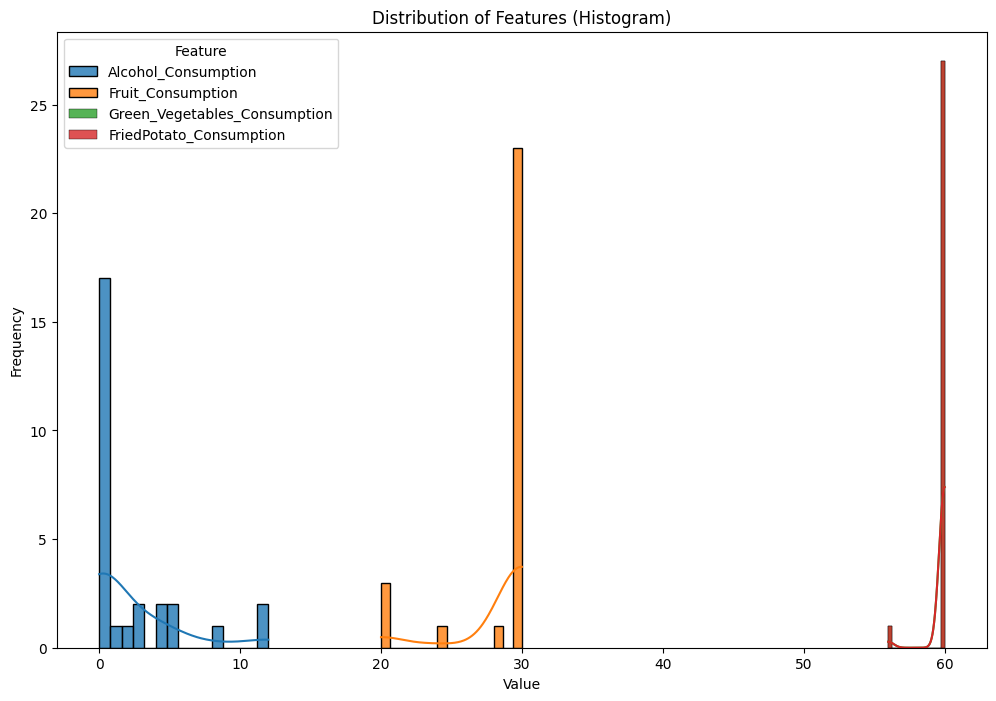

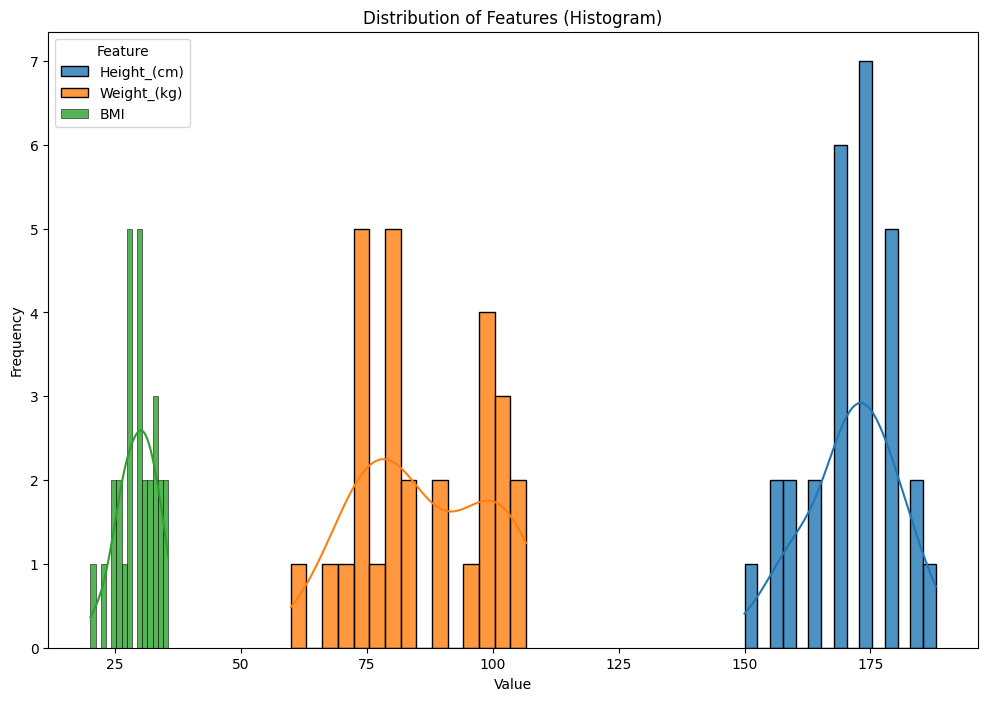

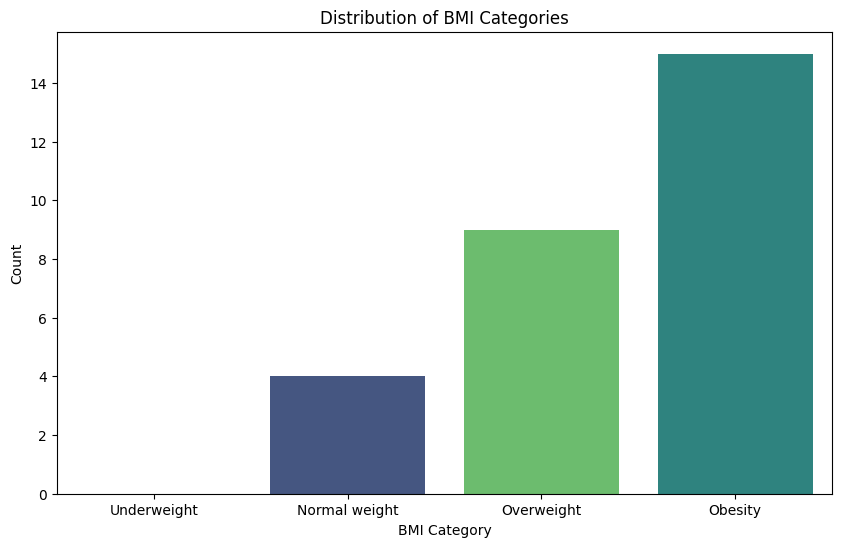

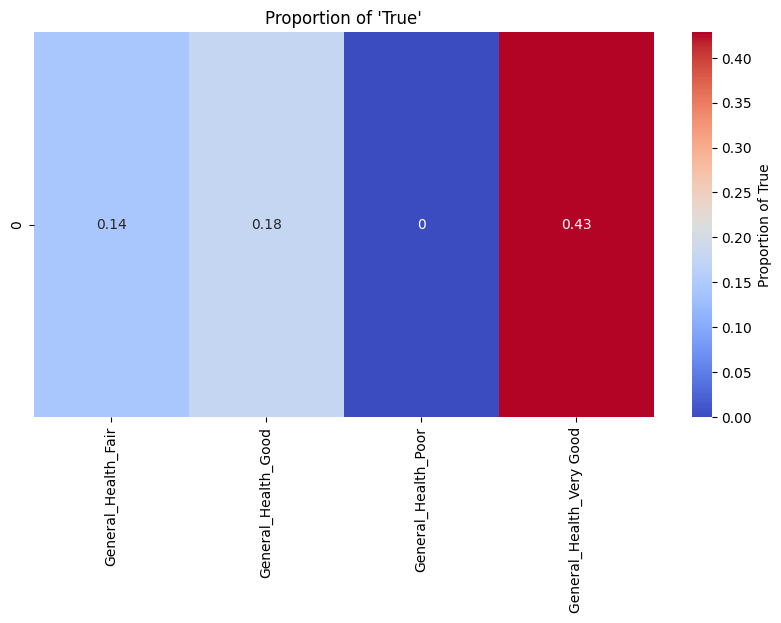

General_Health_Excellent: 7
General_Health_Fair          4
General_Health_Good          5
General_Health_Poor          0
General_Health_Very Good    12
dtype: int64


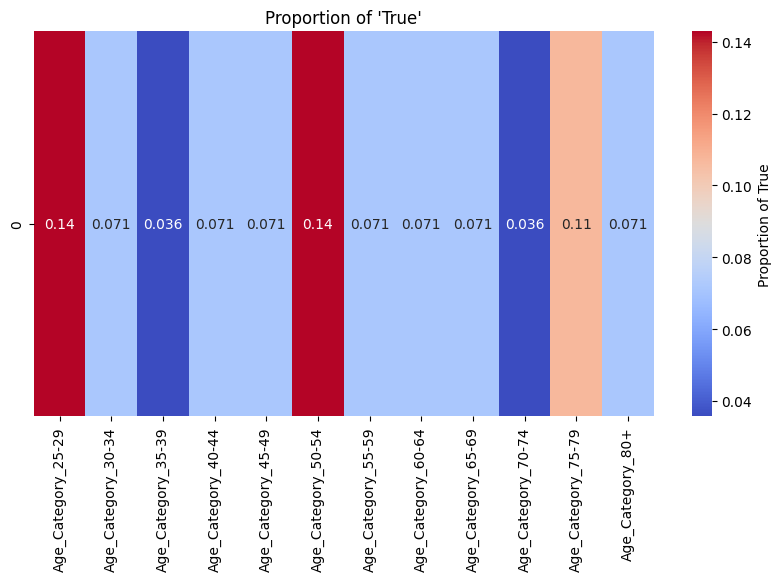

Age_Category_18_24: 1
Age_Category_25-29    4
Age_Category_30-34    2
Age_Category_35-39    1
Age_Category_40-44    2
Age_Category_45-49    2
Age_Category_50-54    4
Age_Category_55-59    2
Age_Category_60-64    2
Age_Category_65-69    2
Age_Category_70-74    1
Age_Category_75-79    3
Age_Category_80+      2
dtype: int64


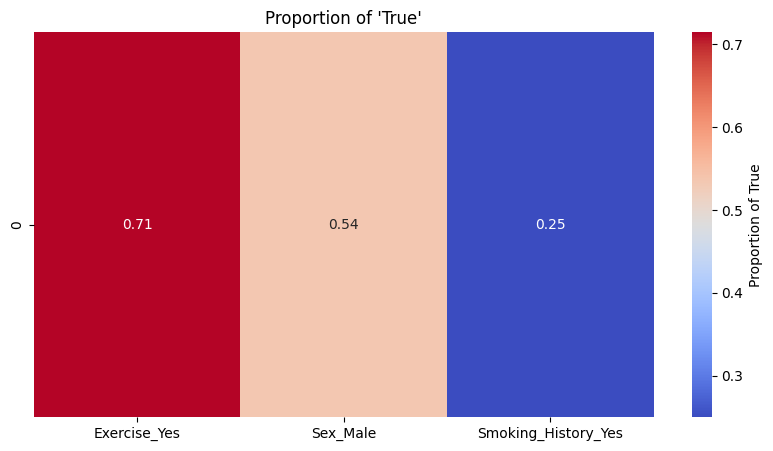

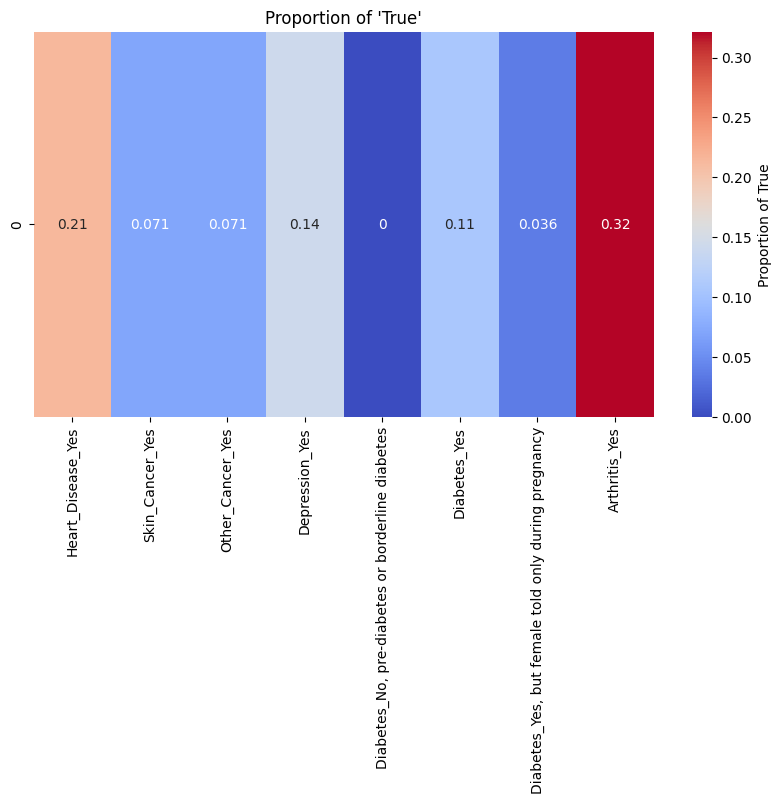

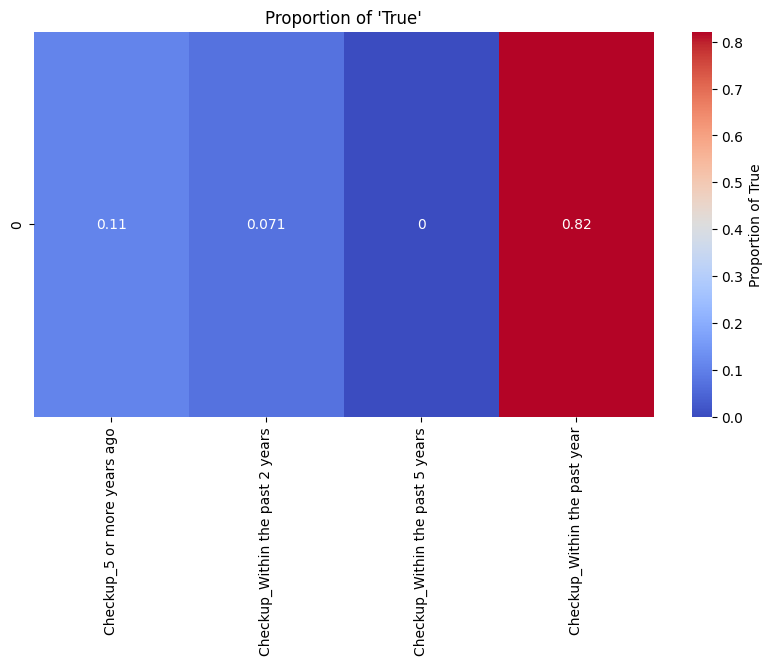

Checkup_never: 2
Checkup_5 or more years ago         3
Checkup_Within the past 2 years     2
Checkup_Within the past 5 years     0
Checkup_Within the past year       23
dtype: int64


In [87]:
x = 2
histplot(food_column,top_5_cluster_info[x][0])
histplot(num_profile_column,top_5_cluster_info[x][0])
plot_bmi_cate(top_5_cluster_info[x][0])
health_heatmap(top_5_cluster_info[x][0],health_columns)
get_excellent_health(top_5_cluster_info[x][0])
print(top_5_cluster_info[x][0][health_columns].sum())
health_heatmap(top_5_cluster_info[x][0],age_column)
get_18_24_age(top_5_cluster_info[x][0])
print(top_5_cluster_info[x][0][age_column].sum())
health_heatmap(top_5_cluster_info[x][0],profile_columns)
health_heatmap(top_5_cluster_info[x][0],conditions_columns)
health_heatmap(top_5_cluster_info[x][0],checkup_column)
get_Checkup_never(top_5_cluster_info[x][0])
print(top_5_cluster_info[x][0][checkup_column].sum())



In [88]:
signi_feature([chosen_5[3]])

Cluster 16 - Significant Features (p < 0.05):
                          Feature    Statistic        P-value      Test type
248                   Height_(cm)    15.142680  8.358357e-132  ANOVA, F-test
249                   Weight_(kg)    56.629510   0.000000e+00  ANOVA, F-test
250                           BMI    72.648836   0.000000e+00  ANOVA, F-test
251           Alcohol_Consumption    24.564470  1.298130e-232  ANOVA, F-test
252             Fruit_Consumption   977.070320   0.000000e+00  ANOVA, F-test
253  Green_Vegetables_Consumption  1714.322836   0.000000e+00  ANOVA, F-test
254       FriedPotato_Consumption  2375.222546   0.000000e+00  ANOVA, F-test
255                      Sex_Male    13.372574   2.553307e-04    Chi-Squared
256            Age_Category_30-34     4.177390   4.096674e-02    Chi-Squared




In [89]:
top_5_cluster_info[3][0]

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes,Cluster,Silhouette,BMI_Category
2529,155.0,63.50,26.45,6.0,90.0,120.0,1.0,False,True,False,False,False,False,False,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,16,0.334192,Overweight
10720,165.0,68.04,24.96,8.0,90.0,120.0,8.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,16,0.416078,Obesity
15975,160.0,65.77,25.69,0.0,90.0,120.0,4.0,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,16,0.437517,Overweight
25897,160.0,72.57,28.34,0.0,90.0,120.0,4.0,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,16,0.482627,Overweight
35636,163.0,88.45,33.47,0.0,90.0,120.0,1.0,False,False,False,True,False,False,False,True,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,16,-0.052891,Obesity
40274,163.0,95.25,36.05,0.0,90.0,120.0,8.0,False,True,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,16,-0.403410,Obesity
40612,163.0,71.21,26.95,0.0,90.0,120.0,0.0,False,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,16,0.498906,Overweight
44060,180.0,85.73,26.36,1.0,90.0,120.0,0.0,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,16,-0.035044,Overweight
44991,160.0,61.23,23.91,0.0,90.0,120.0,8.0,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,16,0.327927,Normal weight
56543,160.0,54.43,21.26,0.0,90.0,120.0,8.0,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,16,0.205457,Normal weight


In [90]:
top_5_cluster_info[3][1]

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Cluster,Silhouette
count,51.000000,51.000000,51.000000,51.000000,51.0,51.000000,51.000000,51.0,51.000000
mean,165.509804,71.070392,26.041569,1.823529,90.0,120.156863,2.607843,16.0,0.312155
std,6.643410,10.365128,4.188048,2.673618,0.0,1.120224,3.225389,0.0,0.199879
min,155.000000,48.530000,18.900000,0.000000,90.0,120.000000,0.000000,16.0,-0.403410
25%,160.000000,63.500000,22.760000,0.000000,90.0,120.000000,0.000000,16.0,0.284602
50%,165.000000,70.310000,25.690000,0.000000,90.0,120.000000,1.000000,16.0,0.370894
75%,170.000000,77.110000,27.370000,4.000000,90.0,120.000000,4.000000,16.0,0.432383
max,180.000000,95.250000,37.200000,12.000000,90.0,128.000000,12.000000,16.0,0.511166


In [91]:
top_5_cluster_info[3][2]

,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes
count,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,49,35,48,39,49,48,49,44,40,48,46,48,44,50,48,51,41,40,48,44,47,47,48,44,45,49,44,47,50,49,37


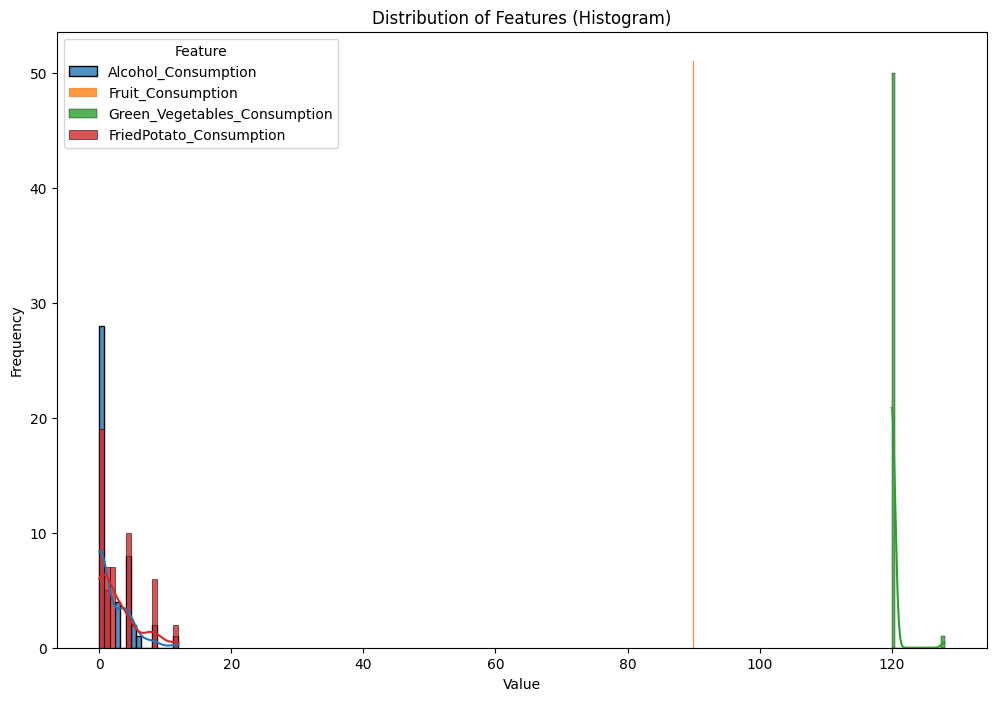

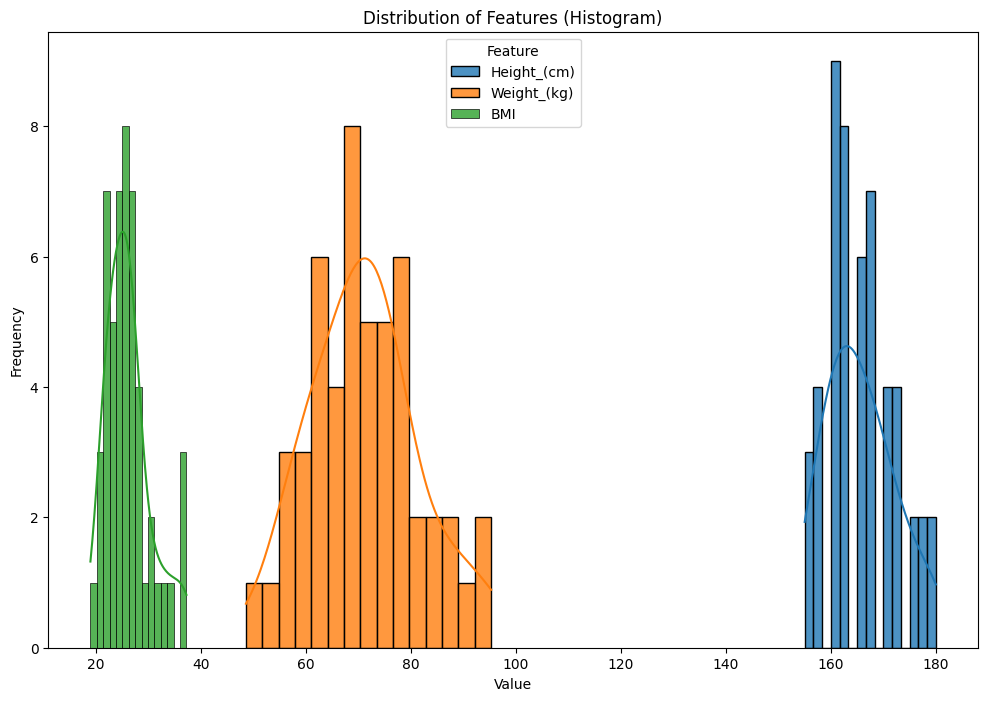

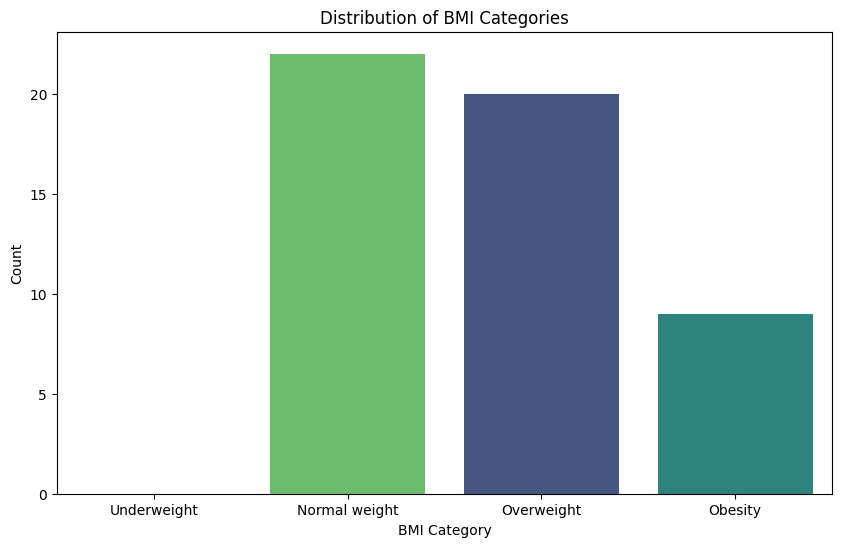

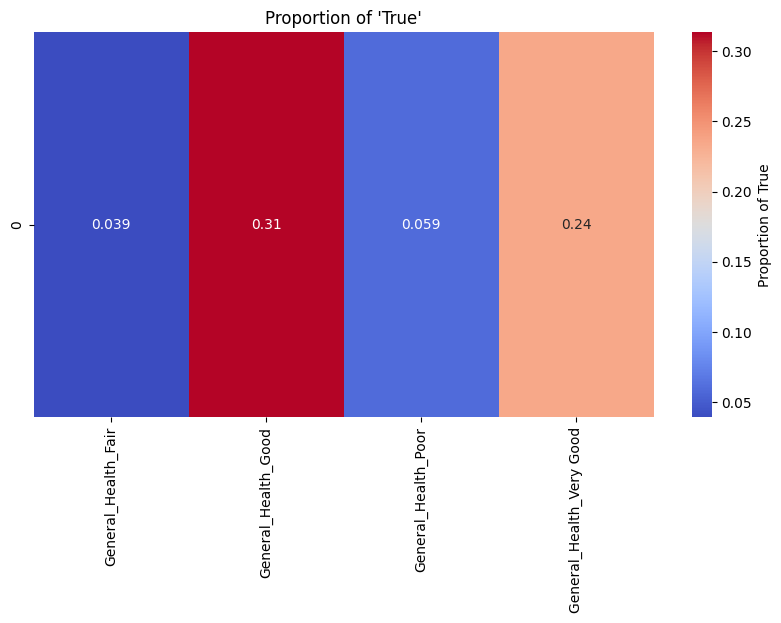

General_Health_Excellent: 18
General_Health_Fair          2
General_Health_Good         16
General_Health_Poor          3
General_Health_Very Good    12
dtype: int64


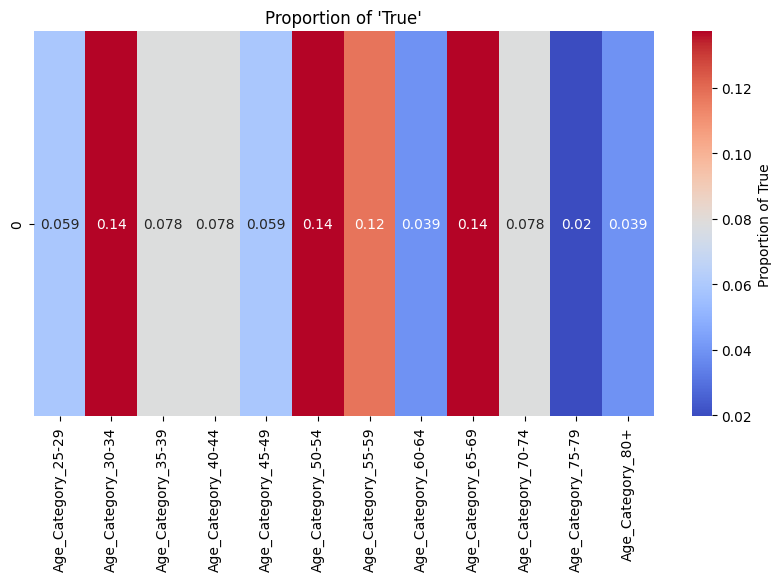

Age_Category_18_24: 1
Age_Category_25-29    3
Age_Category_30-34    7
Age_Category_35-39    4
Age_Category_40-44    4
Age_Category_45-49    3
Age_Category_50-54    7
Age_Category_55-59    6
Age_Category_60-64    2
Age_Category_65-69    7
Age_Category_70-74    4
Age_Category_75-79    1
Age_Category_80+      2
dtype: int64


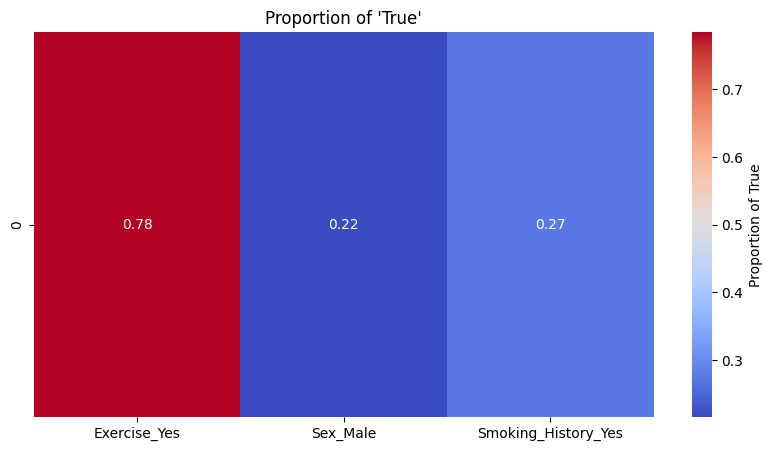

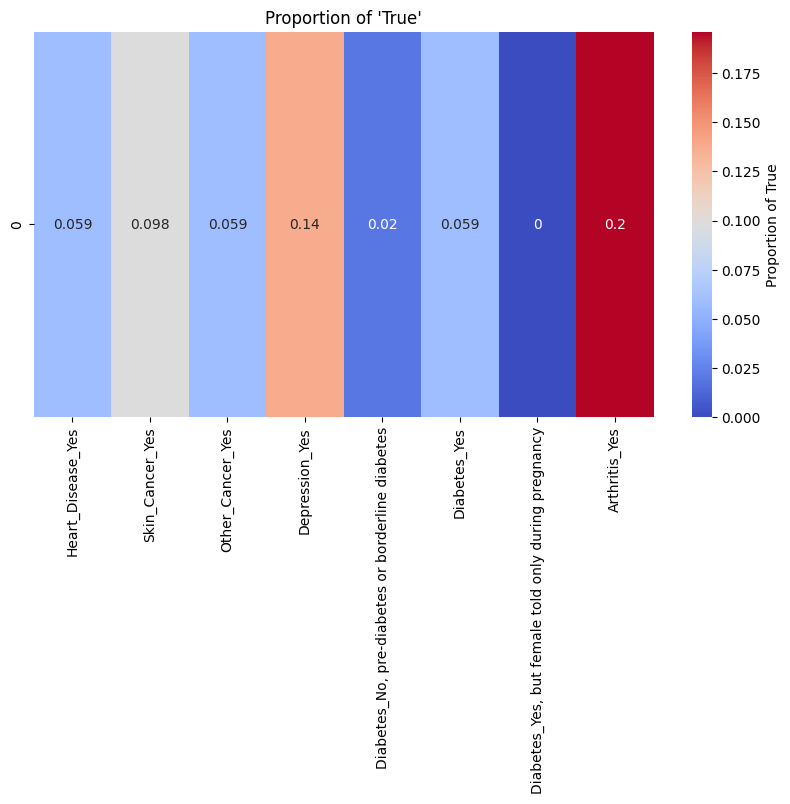

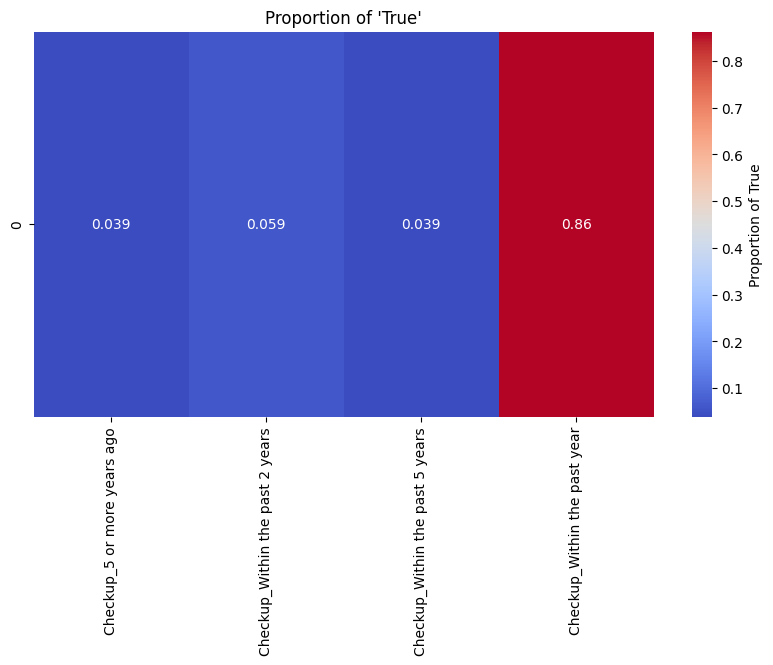

Checkup_never: 3
Checkup_5 or more years ago         2
Checkup_Within the past 2 years     3
Checkup_Within the past 5 years     2
Checkup_Within the past year       44
dtype: int64


In [92]:
x = 3
histplot(food_column,top_5_cluster_info[x][0])
histplot(num_profile_column,top_5_cluster_info[x][0])
plot_bmi_cate(top_5_cluster_info[x][0])
health_heatmap(top_5_cluster_info[x][0],health_columns)
get_excellent_health(top_5_cluster_info[x][0])
print(top_5_cluster_info[x][0][health_columns].sum())
health_heatmap(top_5_cluster_info[x][0],age_column)
get_18_24_age(top_5_cluster_info[x][0])
print(top_5_cluster_info[x][0][age_column].sum())
health_heatmap(top_5_cluster_info[x][0],profile_columns)
health_heatmap(top_5_cluster_info[x][0],conditions_columns)
health_heatmap(top_5_cluster_info[x][0],checkup_column)
get_Checkup_never(top_5_cluster_info[x][0])
print(top_5_cluster_info[x][0][checkup_column].sum())

In [93]:
signi_feature([chosen_5[4]])

Cluster 48 - Significant Features (p < 0.05):
                                              Feature    Statistic  \
0                                         Height_(cm)    15.142680   
1                                         Weight_(kg)    56.629510   
2                                                 BMI    72.648836   
3                                 Alcohol_Consumption    24.564470   
4                                   Fruit_Consumption   977.070320   
5                        Green_Vegetables_Consumption  1714.322836   
6                             FriedPotato_Consumption  2375.222546   
7                                 General_Health_Good    23.617750   
8                                 General_Health_Poor     6.396428   
9                            General_Health_Very Good    16.220056   
10                                       Exercise_Yes    31.140584   
11                                  Heart_Disease_Yes     7.463163   
12                                    Skin_C

In [94]:
top_5_cluster_info[4][0]

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes,Cluster,Silhouette,BMI_Category
0,178.0,86.18,27.26,12.0,30.0,16.0,8.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,48,0.442758,Overweight
1,165.0,79.38,29.12,0.0,60.0,60.0,12.0,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,48,-0.282102,Overweight
2,168.0,72.57,25.82,6.0,0.0,20.0,0.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,48,0.389938,Overweight
3,183.0,93.89,28.07,0.0,60.0,8.0,2.0,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,48,0.230271,Overweight
4,160.0,54.43,21.26,0.0,20.0,6.0,15.0,True,False,False,False,False,False,False,True,True,False,True,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,48,0.319444,Normal weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,185.0,84.37,24.54,0.0,30.0,30.0,15.0,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,48,0.269825,Normal weight
308850,188.0,81.65,23.11,20.0,15.0,30.0,3.0,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,48,0.266068,Normal weight
308851,183.0,88.45,26.45,15.0,8.0,12.0,4.0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,48,0.464430,Overweight
308852,185.0,181.44,52.77,0.0,8.0,8.0,12.0,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,48,0.126396,Obesity


In [95]:
top_5_cluster_info[4][1]

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Cluster,Silhouette
count,301591.000000,301591.000000,301591.000000,301591.00000,301591.000000,301591.000000,301591.000000,301591.0,301591.000000
mean,170.622174,83.508563,28.592214,5.07913,28.722462,14.338558,5.948447,48.0,0.282593
std,10.562761,21.023899,6.383559,8.18246,23.072960,12.840609,6.796086,0.0,0.231214
min,115.000000,24.950000,12.020000,0.00000,0.000000,0.000000,0.000000,48.0,-0.705731
25%,163.000000,68.040000,24.210000,0.00000,12.000000,4.000000,2.000000,48.0,0.221881
50%,170.000000,81.650000,27.440000,1.00000,30.000000,12.000000,4.000000,48.0,0.358655
75%,178.000000,95.250000,31.800000,6.00000,30.000000,20.000000,8.000000,48.0,0.430746
max,218.000000,238.140000,89.100000,30.00000,104.000000,100.000000,68.000000,48.0,0.536457


In [96]:
top_5_cluster_info[4][2]

,General_Health_Fair,General_Health_Good,General_Health_Poor,General_Health_Very Good,Checkup_5 or more years ago,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,Exercise_Yes,Heart_Disease_Yes,Skin_Cancer_Yes,Other_Cancer_Yes,Depression_Yes,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Arthritis_Yes,Sex_Male,Age_Category_25-29,Age_Category_30-34,Age_Category_35-39,Age_Category_40-44,Age_Category_45-49,Age_Category_50-54,Age_Category_55-59,Age_Category_60-64,Age_Category_65-69,Age_Category_70-74,Age_Category_75-79,Age_Category_80+,Smoking_History_Yes
count,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591,301591
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,266621,208280,290567,193629,288509,265281,284529,233768,233555,277144,272169,272333,241146,294851,262354,299034,202722,156326,286483,283670,281565,280602,281191,277168,274157,269909,268861,271095,281263,279716,179064


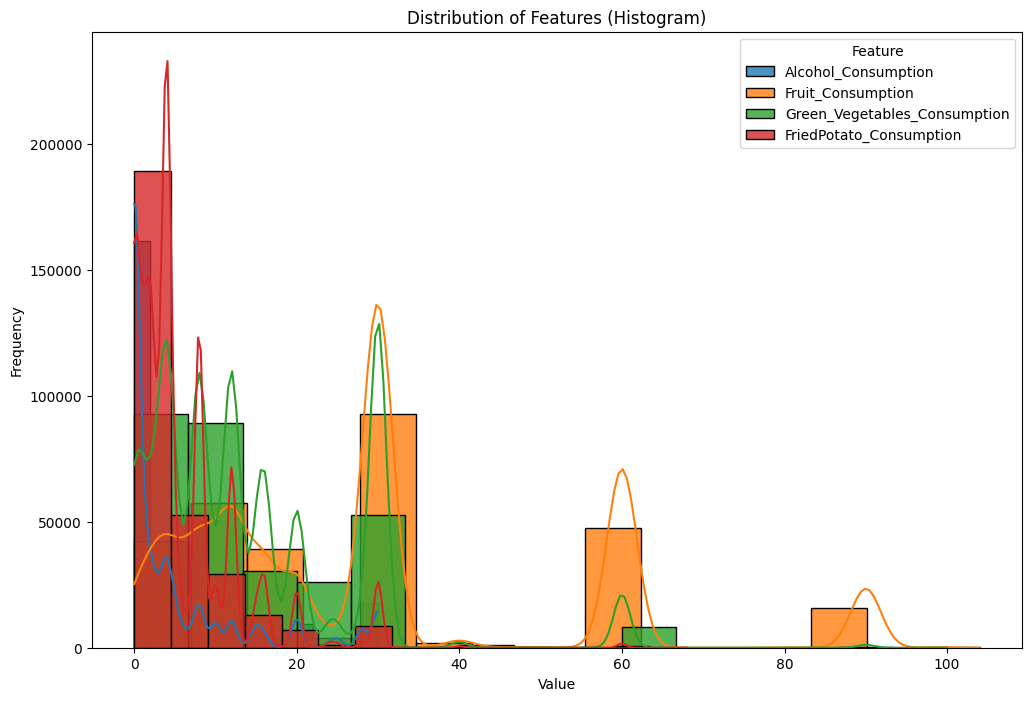

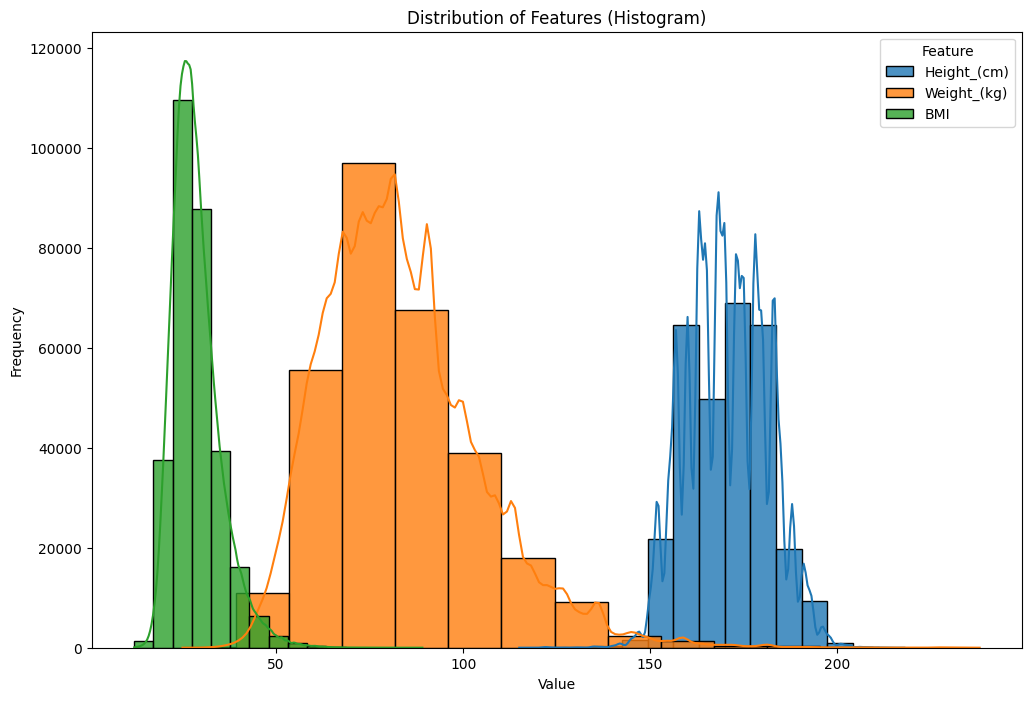

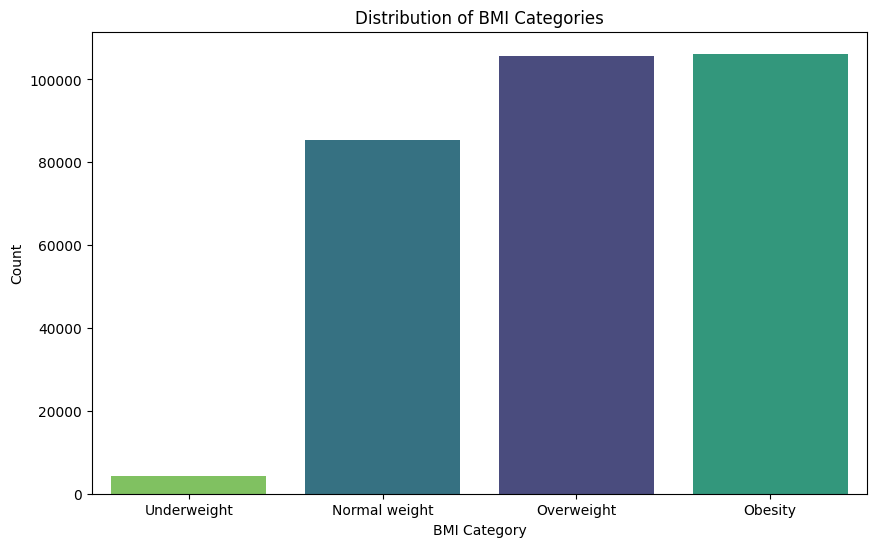

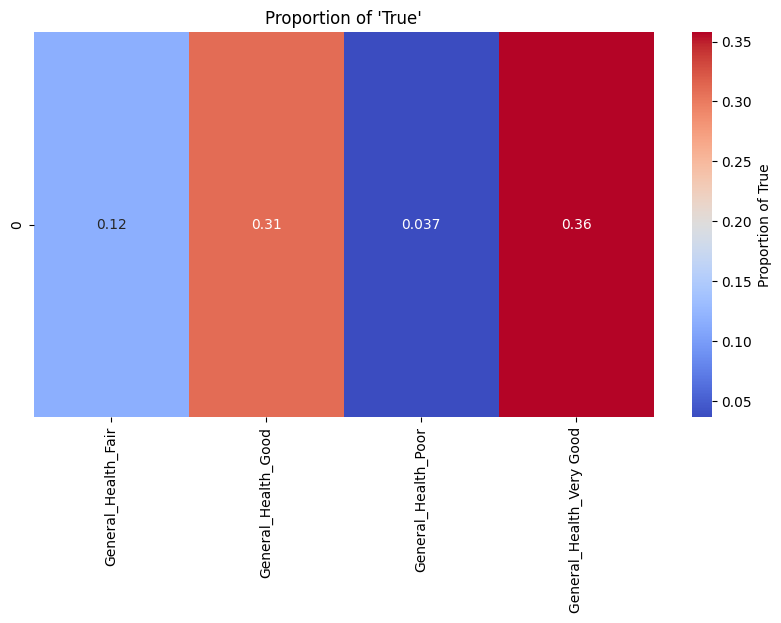

General_Health_Excellent: 54324
General_Health_Fair          34970
General_Health_Good          93311
General_Health_Poor          11024
General_Health_Very Good    107962
dtype: int64


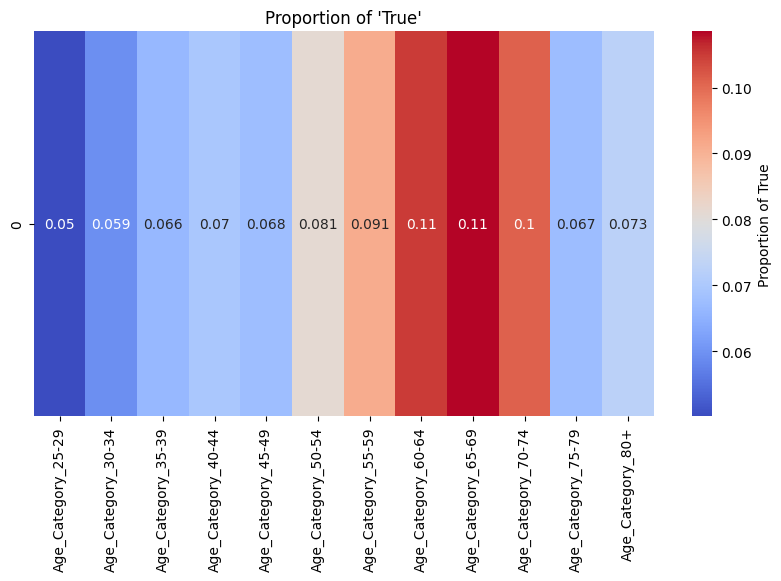

Age_Category_18_24: 18179
Age_Category_25-29    15108
Age_Category_30-34    17921
Age_Category_35-39    20026
Age_Category_40-44    20989
Age_Category_45-49    20400
Age_Category_50-54    24423
Age_Category_55-59    27434
Age_Category_60-64    31682
Age_Category_65-69    32730
Age_Category_70-74    30496
Age_Category_75-79    20328
Age_Category_80+      21875
dtype: int64


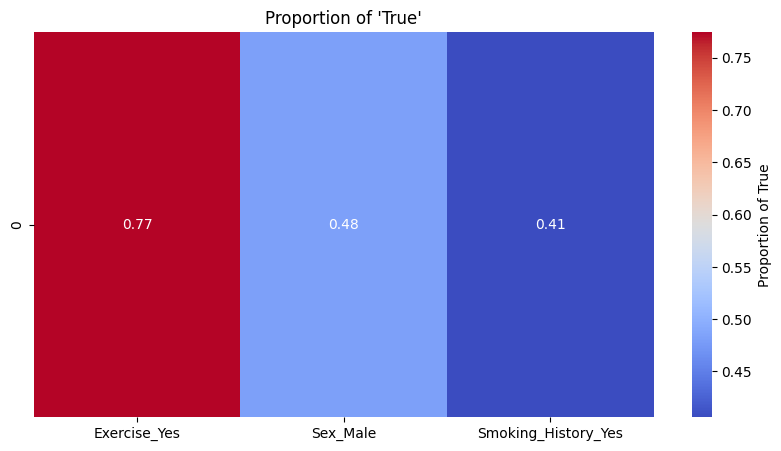

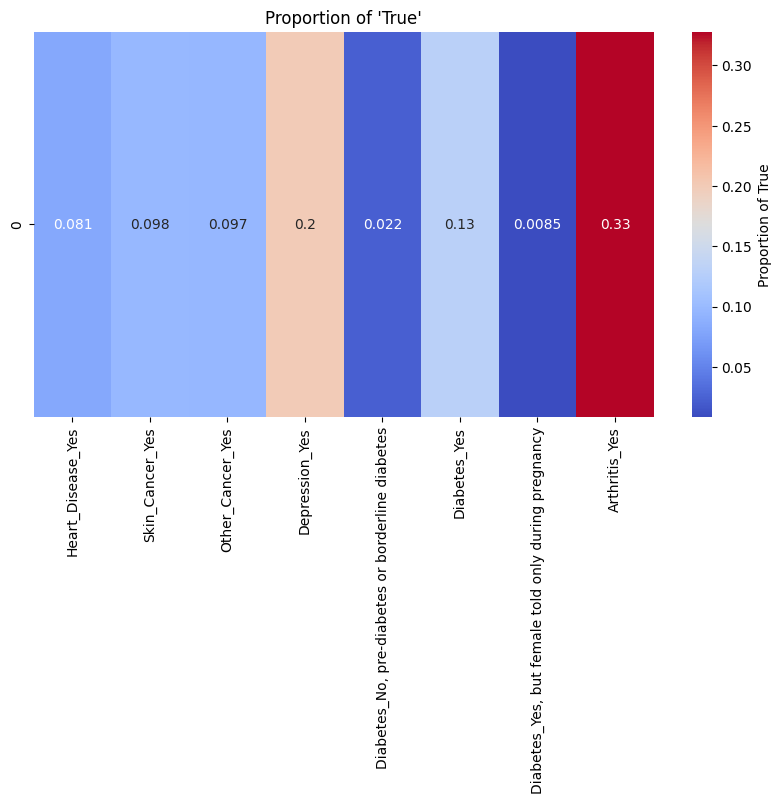

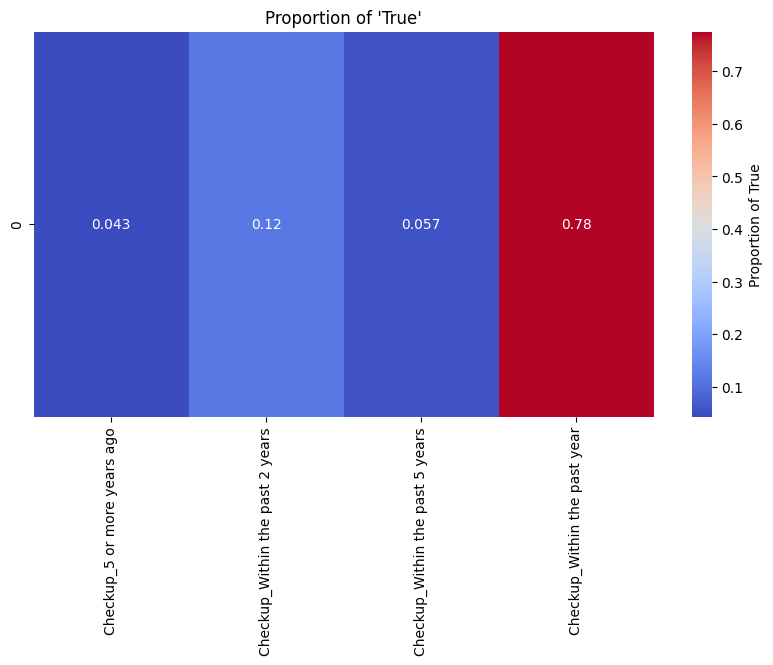

Checkup_never: 37679
Checkup_5 or more years ago         13082
Checkup_Within the past 2 years     36310
Checkup_Within the past 5 years     17062
Checkup_Within the past year       233768
dtype: int64


In [97]:
x = 4
histplot(food_column,top_5_cluster_info[x][0])
histplot(num_profile_column,top_5_cluster_info[x][0])
plot_bmi_cate(top_5_cluster_info[x][0])
health_heatmap(top_5_cluster_info[x][0],health_columns)
get_excellent_health(top_5_cluster_info[x][0])
print(top_5_cluster_info[x][0][health_columns].sum())
health_heatmap(top_5_cluster_info[x][0],age_column)
get_18_24_age(top_5_cluster_info[x][0])
print(top_5_cluster_info[x][0][age_column].sum())
health_heatmap(top_5_cluster_info[x][0],profile_columns)
health_heatmap(top_5_cluster_info[x][0],conditions_columns)
health_heatmap(top_5_cluster_info[x][0],checkup_column)
get_Checkup_never(top_5_cluster_info[x][0])
print(top_5_cluster_info[x][0][checkup_column].sum())

In [5]:
clustered_data.value_counts()

Height_(cm)  Weight_(kg)  BMI    Alcohol_Consumption  Fruit_Consumption  Green_Vegetables_Consumption  FriedPotato_Consumption  General_Health_Fair  General_Health_Good  General_Health_Poor  General_Health_Very Good  Checkup_5 or more years ago  Checkup_Within the past 2 years  Checkup_Within the past 5 years  Checkup_Within the past year  Exercise_Yes  Heart_Disease_Yes  Skin_Cancer_Yes  Other_Cancer_Yes  Depression_Yes  Diabetes_No, pre-diabetes or borderline diabetes  Diabetes_Yes  Diabetes_Yes, but female told only during pregnancy  Arthritis_Yes  Sex_Male  Age_Category_25-29  Age_Category_30-34  Age_Category_35-39  Age_Category_40-44  Age_Category_45-49  Age_Category_50-54  Age_Category_55-59  Age_Category_60-64  Age_Category_65-69  Age_Category_70-74  Age_Category_75-79  Age_Category_80+  Smoking_History_Yes  Cluster  Silhouette
168.0        74.84        26.63  0.0                  30.0               30.0                          4.0                      False                Fals

In [ ]:
from scipy.stats import chi2_contingency, f_oneway

In [6]:
cleaned_data = pd.read_csv("CVD_cleaned.csv")

In [8]:
cleaned_data.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


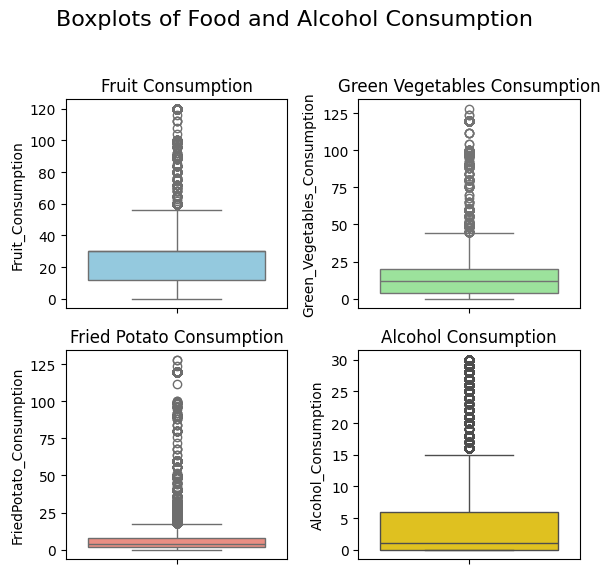

In [87]:
df = cleaned_data

fig, axs = plt.subplots(2, 2, figsize=(6, 6))
fig.suptitle('Boxplots of Food and Alcohol Consumption', fontsize=16)

# Plot each boxplot on a separate subplot
sns.boxplot(data=df, y='Fruit_Consumption', ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Fruit Consumption')

sns.boxplot(data=df, y='Green_Vegetables_Consumption', ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Green Vegetables Consumption')

sns.boxplot(data=df, y='FriedPotato_Consumption', ax=axs[1, 0], color='salmon')
axs[1, 0].set_title('Fried Potato Consumption')

sns.boxplot(data=df, y='Alcohol_Consumption', ax=axs[1, 1], color='gold')
axs[1, 1].set_title('Alcohol Consumption')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

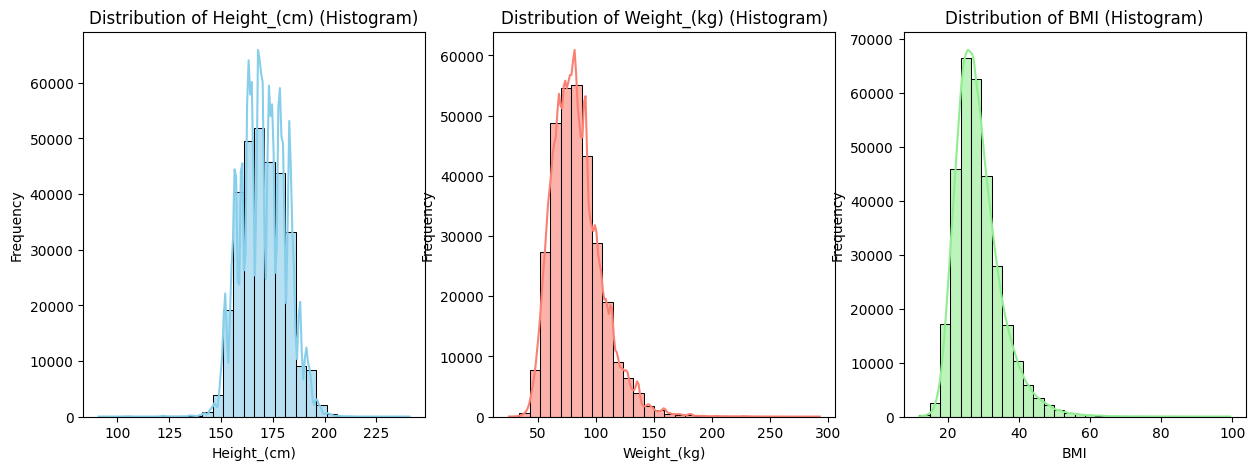

In [88]:


fig, axs = plt.subplots(1, 3, figsize=(15, 5))
x=0
color = ["skyblue", "salmon", "lightgreen"]
for col in num_profile_column:
    sns.histplot(df[col], kde=True, label=col, bins=30, alpha=0.60, ax=axs[x], color=color[x])
    axs[x].set_title(f"Distribution of {col} (Histogram)")
    axs[x].set_xlabel(col)
    axs[x].set_ylabel("Frequency")
    x = x + 1
plt.show()

<Axes: xlabel='Checkup', ylabel='Count'>

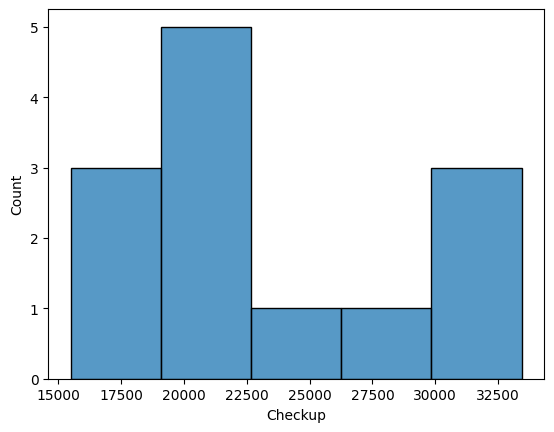

In [28]:
sns.histplot(cleaned_data.groupby(["Age_Category"]).count()["Checkup"])

<Axes: xlabel='Age_Category'>

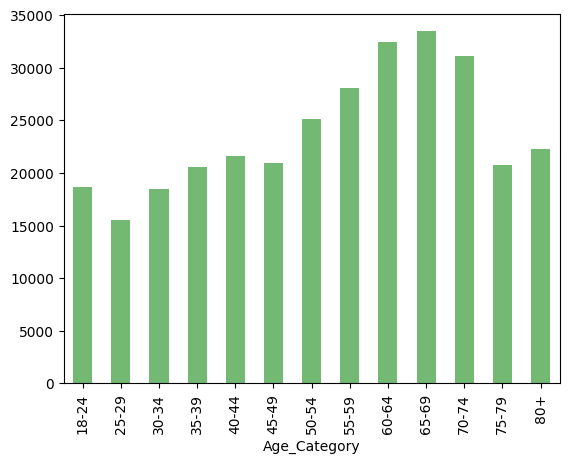

In [112]:
cleaned_data.groupby(["Age_Category"]).count()["Checkup"].plot(kind="bar", color=["green"],width=0.5,alpha=0.55)

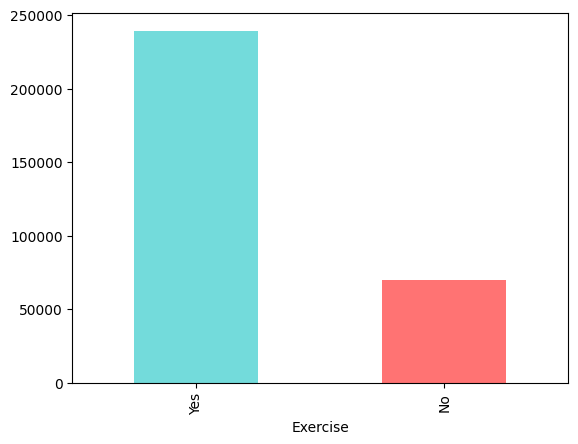

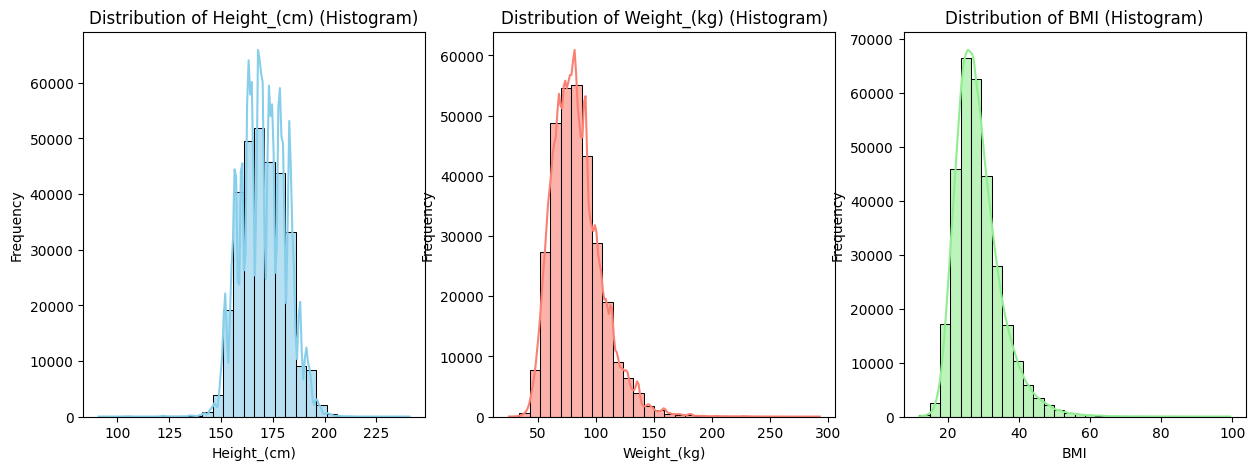

In [89]:

cleaned_data['Exercise'].value_counts().plot(kind="bar", color=["c","r"],width=0.5,alpha=0.55)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
x=0
color = ["skyblue", "salmon", "lightgreen"]
for col in num_profile_column:
    sns.histplot(df[col], kde=True, label=col, bins=30, alpha=0.60, ax=axs[x], color=color[x])
    axs[x].set_title(f"Distribution of {col} (Histogram)")
    axs[x].set_xlabel(col)
    axs[x].set_ylabel("Frequency")
    x = x + 1
plt.show()

In [71]:
cleaned_data['Exercise'].value_counts().max() * 1.2
categorical_features_cleaned

['General_Health',
 'Checkup',
 'Exercise',
 'Heart_Disease',
 'Skin_Cancer',
 'Other_Cancer',
 'Depression',
 'Diabetes',
 'Arthritis',
 'Sex',
 'Age_Category',
 'Smoking_History']

In [72]:
chosen_cat = categorical_features_cleaned[2:-2]
chosen_cat.append("Smoking_History")
chosen_cat

['Exercise',
 'Heart_Disease',
 'Skin_Cancer',
 'Other_Cancer',
 'Depression',
 'Diabetes',
 'Arthritis',
 'Sex',
 'Smoking_History']

In [77]:
categories = ['Exercise','Sex','Smoking_History']

In [99]:
chosen_cat = chosen_cat[1:-2]
chosen_cat

['Heart_Disease',
 'Skin_Cancer',
 'Other_Cancer',
 'Depression',
 'Diabetes',
 'Arthritis']

C:\Users\serig\AppData\Local\Temp\ipykernel_39148\3606467002.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_data, x=categories[i], ax=axs[i], palette="Greens")
C:\Users\serig\AppData\Local\Temp\ipykernel_39148\3606467002.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_data, x=categories[i], ax=axs[i], palette="Greens")
C:\Users\serig\AppData\Local\Temp\ipykernel_39148\3606467002.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_data, x=categories[i], ax=axs[i], palette="Greens")


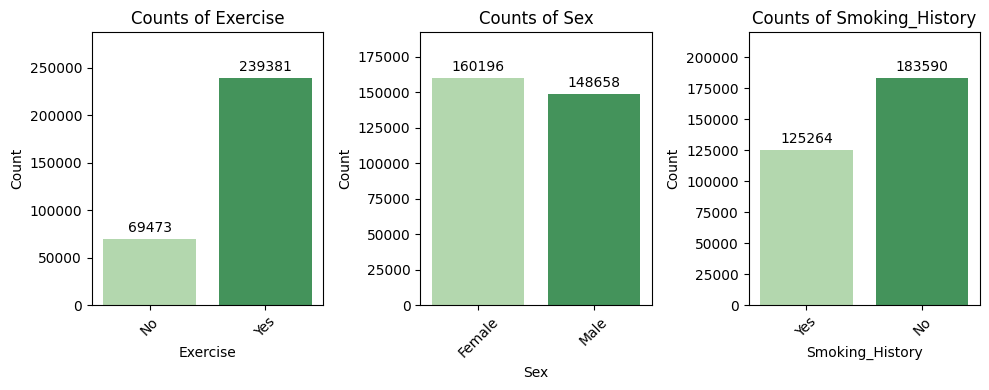

In [98]:
fig, axs = plt.subplots(1, 3, figsize=(10,4))
#categorical_features_cleaned = cleaned_data.select_dtypes(include=['object']).columns.tolist()

for i in range(len(categories)):
    sns.countplot(data=cleaned_data, x=categories[i], ax=axs[i], palette="Greens")
    axs[i].set_title(f"Counts of {categories[i]}")
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].set_xlabel(categories[i])
    axs[i].set_ylabel("Count")
    axs[i].set_ylim(0, cleaned_data[categories[i]].value_counts().max() * 1.2)

    for p in axs[i].patches:
        axs[i].annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'baseline',
                        fontsize=10, color='black', xytext=(0, 5), 
                        textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\serig\AppData\Local\Temp\ipykernel_39148\2630134353.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_data, x=chosen_cat[i], ax=axs[i // 3, i % 3], palette="Greens")
C:\Users\serig\AppData\Local\Temp\ipykernel_39148\2630134353.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_data, x=chosen_cat[i], ax=axs[i // 3, i % 3], palette="Greens")
C:\Users\serig\AppData\Local\Temp\ipykernel_39148\2630134353.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_data, x=chosen_cat[i], ax=axs[i // 

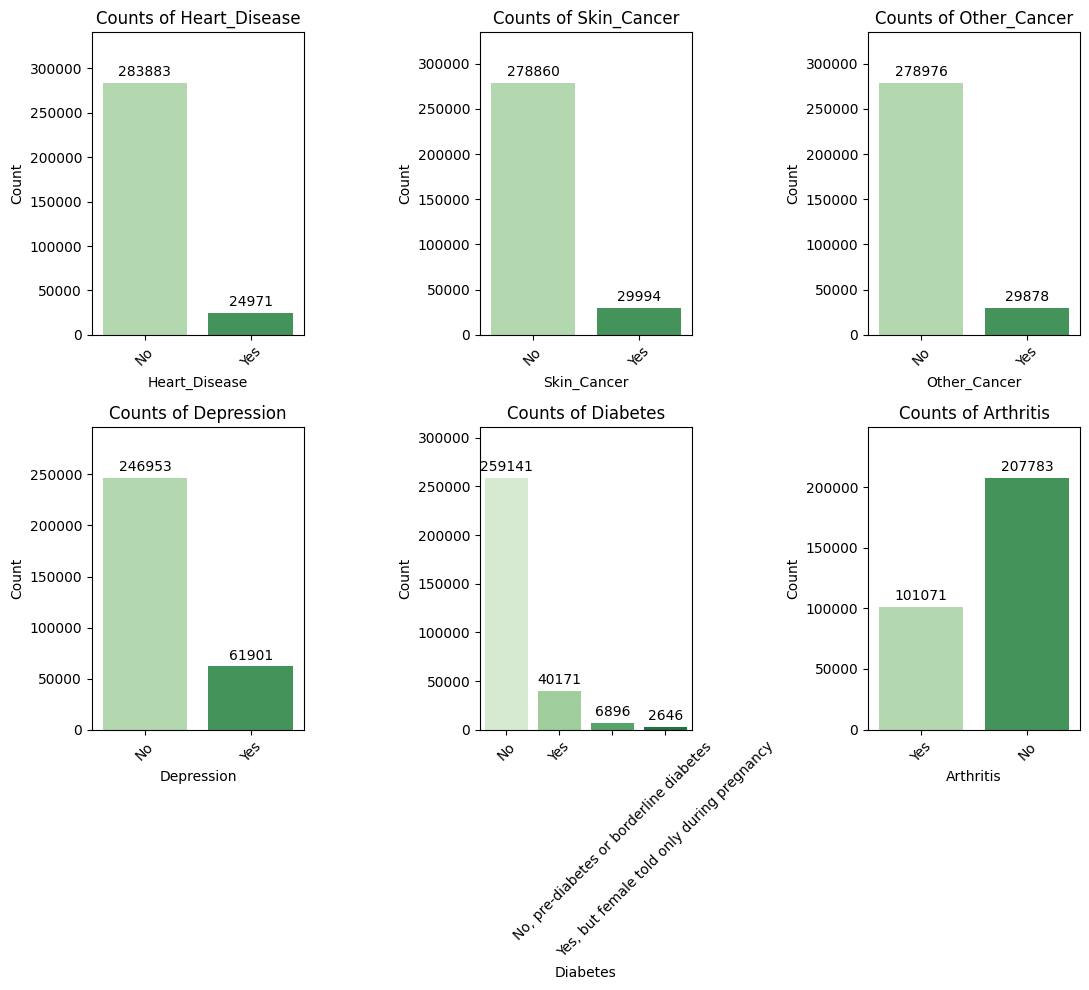

In [110]:
fig, axs = plt.subplots(2, 3, figsize=(11,10))
#categorical_features_cleaned = cleaned_data.select_dtypes(include=['object']).columns.tolist()

for i in range(len(chosen_cat)):
    sns.countplot(data=cleaned_data, x=chosen_cat[i], ax=axs[i // 3, i % 3], palette="Greens")
    axs[i // 3, i % 3].set_title(f"Counts of {chosen_cat[i]}")
    axs[i // 3, i % 3].tick_params(axis='x', rotation=45)
    axs[i // 3, i % 3].set_xlabel(chosen_cat[i])
    axs[i // 3, i % 3].set_ylabel("Count")
    axs[i // 3, i % 3].set_ylim(0, cleaned_data[chosen_cat[i]].value_counts().max() * 1.2)

    for p in axs[i // 3, i % 3].patches:
        axs[i // 3, i % 3].annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'baseline',
                        fontsize=10, color='black', xytext=(0, 5), 
                        textcoords='offset points')

# Adjust layout
plt.tight_layout()
plt.show()

In [149]:
cleaned_data[num_profile_column].describe()

,Height_(cm),Weight_(kg),BMI
count,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211
std,10.658026,21.343210,6.522323
min,91.000000,24.950000,12.020000
25%,163.000000,68.040000,24.210000
50%,170.000000,81.650000,27.440000
75%,178.000000,95.250000,31.850000
max,241.000000,293.020000,99.330000


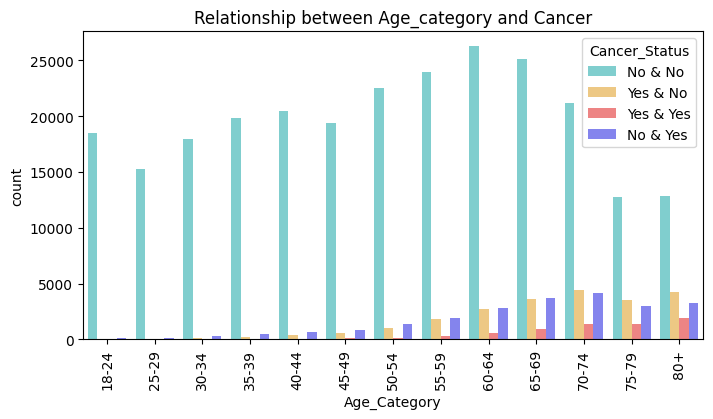

In [135]:
#cleaned_data.groupby(["Age_Category","Other_Cancer","Skin_Cancer"]).count()["Checkup"].plot(kind="bar", color=["c","r","r","r"],width=0.85,alpha=0.55)

df['Cancer_Status'] = cleaned_data['Skin_Cancer'] + ' & ' + cleaned_data['Other_Cancer']
age_order = ['18-24',
    '25-29', '30-34', '35-39', '40-44', 
    '45-49', '50-54', '55-59', '60-64', 
    '65-69', '70-74', '75-79', '80+'
]
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Age_Category", hue="Cancer_Status", palette={"Yes & Yes": "r", "Yes & No": "orange", "No & Yes": "blue", "No & No": "c"}, alpha=0.55, order=age_order)
plt.title('Relationship between Age_category and Cancer')
plt.xticks(rotation=90)
plt.show()

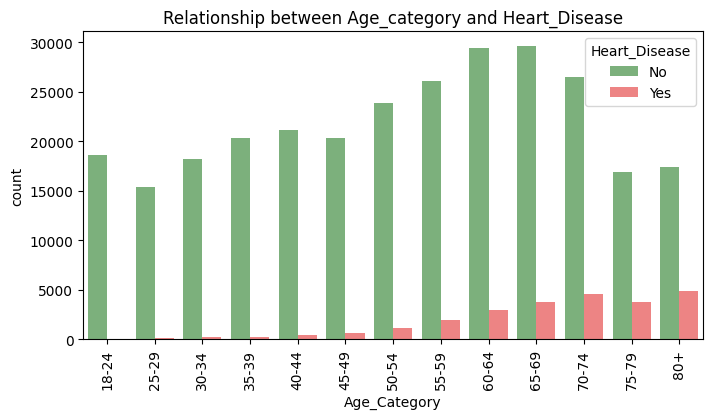

In [143]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Age_Category", hue="Heart_Disease",alpha=0.55, palette={"Yes": "r", "No" : "g"},order=age_order)
plt.title('Relationship between Age_category and Heart_Disease')
plt.xticks(rotation=90)
plt.show()

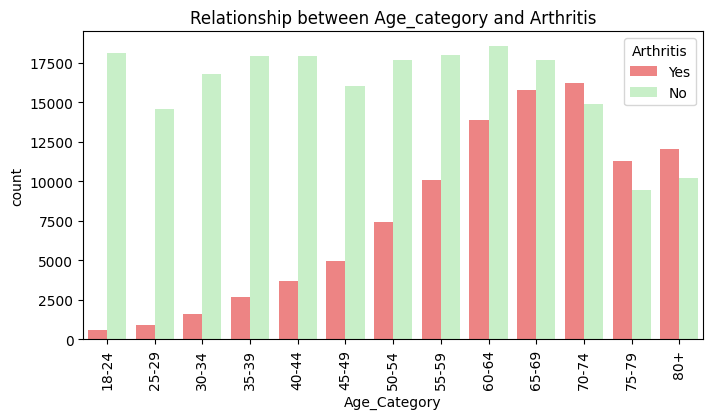

In [144]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Age_Category", hue="Arthritis",alpha=0.55, palette={"Yes": "red", "No" : "Lightgreen"},order=age_order)
plt.title('Relationship between Age_category and Arthritis')
plt.xticks(rotation=90)
plt.show()

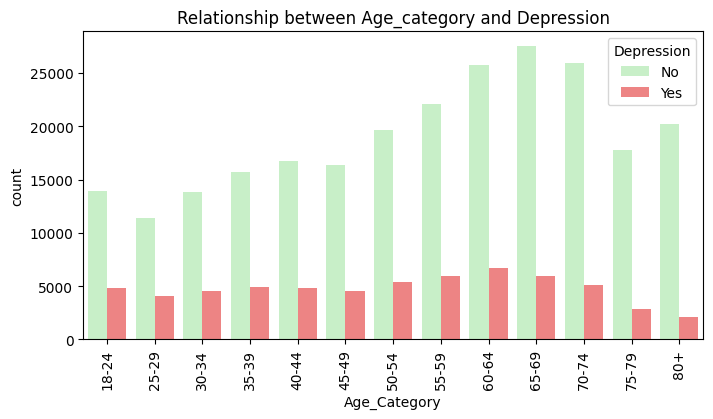

In [145]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Age_Category", hue="Depression",alpha=0.55, palette={"Yes": "red", "No" : "Lightgreen"},order=age_order)
plt.title('Relationship between Age_category and Depression')
plt.xticks(rotation=90)
plt.show()

In [38]:
categorical_features_cleaned = cleaned_data.select_dtypes(include=['object']).columns.tolist()
categorical_features_cleaned

['General_Health',
 'Checkup',
 'Exercise',
 'Heart_Disease',
 'Skin_Cancer',
 'Other_Cancer',
 'Depression',
 'Diabetes',
 'Arthritis',
 'Sex',
 'Age_Category',
 'Smoking_History']

In [1]:
tempdata = cleaned_data.sample(frac=1, random_state=42)

NameError: name 'cleaned_data' is not defined

In [101]:
labels

0         48
1         48
2         48
3         48
4         48
          ..
308849    48
308850    48
308851    48
308852    48
308853    48
Name: Cluster, Length: 308854, dtype: int64

In [109]:
tempdata["Cluster"] = labels
tempdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308854 entries, 302051 to 121958
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [110]:
def hypotestest (p_threshold,df):
    significant_features = {}

    # Loop over each unique cluster
    for cluster in df['Cluster'].unique():
        # Filter the data for the current cluster
        df_cluster = df[df['Cluster'] == cluster]
        
        # Initialize a list to store significant features for this cluster
        significant_features[cluster] = []
        
        # Loop over each feature (excluding the 'Cluster' column)
        for feature in df.drop(columns=['Cluster']).columns:
            if df[feature].dtype == 'object' or df[feature].nunique() > 10:  # Categorical features
                # Create a contingency table for the feature and cluster assignment
                contingency_table = pd.crosstab(df[feature], df['Cluster'] == cluster)
                
                # Perform the Chi-square test
                chi2, p, _, _ = chi2_contingency(contingency_table)
                
                # Check if the p-value is below 0.10
                test_type = "Chi-Squared"
                if p < p_threshold:
                    significant_features[cluster].append((feature, chi2, p, test_type))
            
            else:  # Numerical features
                # Perform ANOVA test for numerical features against cluster
                f_stat, p = f_oneway(*[group[feature].values for name, group in df.groupby('Cluster')])
                
                test_type = "ANOVA, F-test"
                
                # Check if the p-value is below 0.10
                if p < p_threshold:
                    significant_features[cluster].append((feature, f_stat, p, test_type))
                    
    return significant_features


In [111]:
temp = hypotestest(0.05,tempdata)

In [107]:
significant_df_temp = pd.DataFrame([
    {"Cluster": cluster, "Feature": feature, "Statistic": stat, "P-value": p, "Test type": test_type}
    for cluster, features in temp.items() for feature, stat, p, test_type in features
])

print(significant_df_temp)

    Cluster          Feature  Statistic   P-value    Test type
0        39  Smoking_History   4.562643  0.032677  Chi-Squared
1        50         Exercise   5.217569  0.022360  Chi-Squared
2        16         Diabetes  16.640530  0.000838  Chi-Squared
3        40    Heart_Disease   5.033609  0.024860  Chi-Squared
4        28          Checkup  15.663848  0.003505  Chi-Squared
5        37     Age_Category  22.102896  0.036383  Chi-Squared
6        46              Sex   4.370653  0.036563  Chi-Squared
7         4   General_Health  11.559711  0.020944  Chi-Squared
8         7          Checkup  21.594133  0.000241  Chi-Squared
9        13          Checkup  11.488668  0.021588  Chi-Squared
10       42     Age_Category  24.885864  0.015373  Chi-Squared
11       26     Other_Cancer   5.969070  0.014559  Chi-Squared
12        3          Checkup  14.397768  0.006128  Chi-Squared
13       22   General_Health  13.311262  0.009851  Chi-Squared
14        9         Diabetes   8.019738  0.045606  Chi-